In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
start=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/50_Startups.csv')
start

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

<AxesSubplot:>

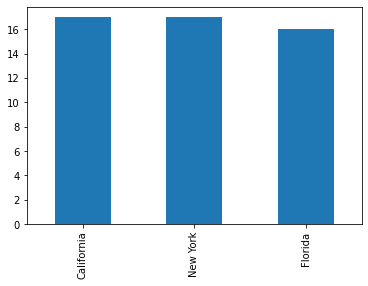

In [3]:
start['State'].value_counts().plot.bar() ##Bar plot

In [4]:
startup = start.drop('State', axis = 1)
startup.head(7)

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94
5  131876.90        99814.71        362861.36  156991.12
6  134615.46       147198.87        127716.82  156122.51

In [5]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
startup.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [8]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
startup.corr()   #Correlation

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

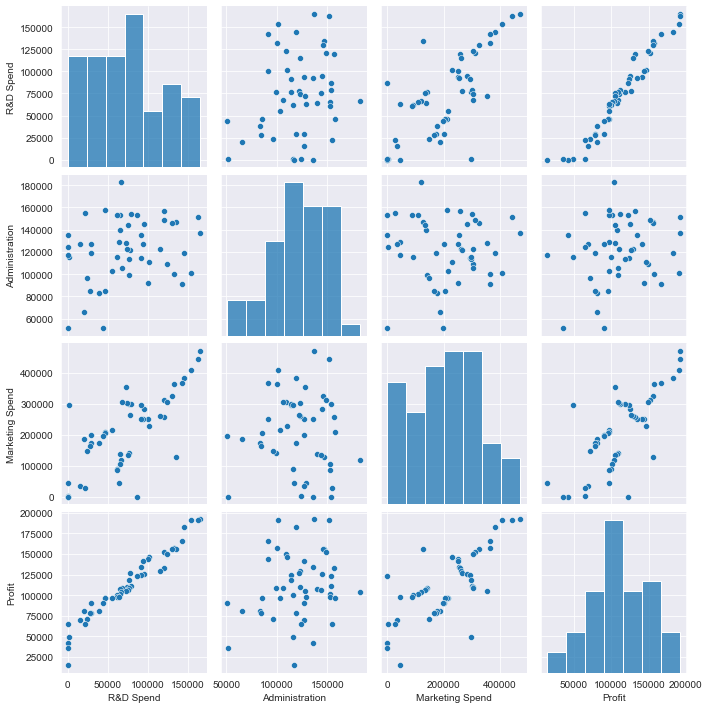

In [10]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(startup)

<AxesSubplot:>

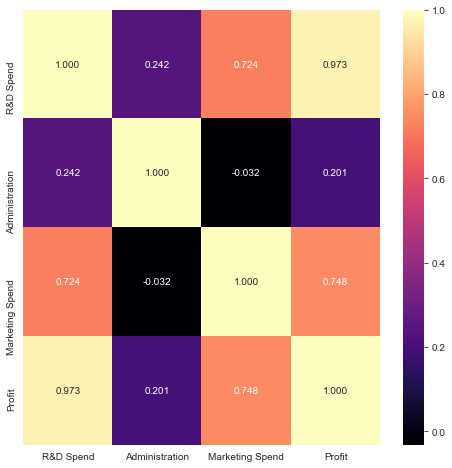

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(startup.corr(), cmap='magma', annot=True, fmt=".3f")   #Heatmap fmt=".no. of decimals" 

<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

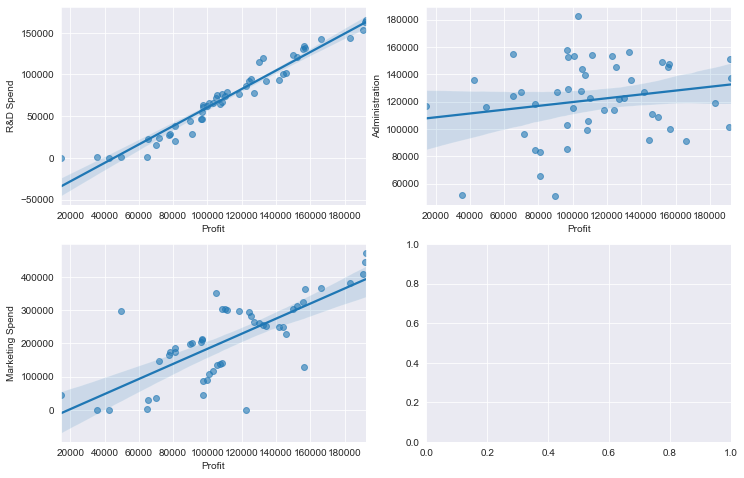

In [12]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'R&D Spend', data = startup, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = startup, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend', data = startup, scatter_kws={'alpha':0.6}, ax = axes[1,0])


# Model Building

In [13]:
## Usking Sklearn 

In [14]:
X = startup.drop(['Profit'], axis = 1).values        
y = startup.iloc[:, 3].values.reshape(-1,1)
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [15]:
model = linear_model.LinearRegression() 
model.fit(X,y)

LinearRegression()

In [16]:

model.rank_

3

In [17]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [18]:
model.intercept_

array([50122.19298987])

In [19]:

r2_score(y,model.predict(X))

0.9507459940683246

# Prediction

In [20]:
startup_new=pd.DataFrame({"R&D Spend":152200,"Administration":155300,"Marketing Spend":472000},index=[1]) 
model.predict(startup_new)
print("The profit will be:",model.predict(startup_new)) 	

The profit will be: [[181439.15028132]]


In [21]:
# Using stats.ols

In [22]:

d1=startup.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startups=d1.rename({'R&D Spend':'RandD_Spend'},axis=1)
startups.head(2)

RandD_Spend  Administration  Marketing_Spend     Profit
0     165349.2       136897.80        471784.10  192261.83
1     162597.7       151377.59        443898.53  191792.06

In [23]:
module = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = startups).fit()
module.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        21:18:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Test for Normality of Residuals (Q-Q Plot)

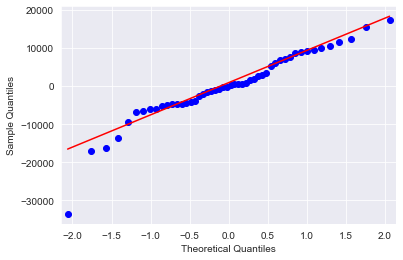

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(module.resid,line='q') # line = 45 to draw the diagnoal line

# Residual Plot for Homoscedasticity

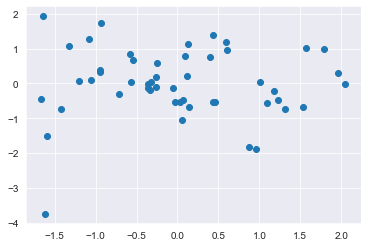

In [25]:
def std( vals ):                      #Loop created for return values.
    return (vals - vals.mean())/vals.std()

plt.scatter(std(module.fittedvalues),
            std(module.resid))

# Residual Vs Regressors

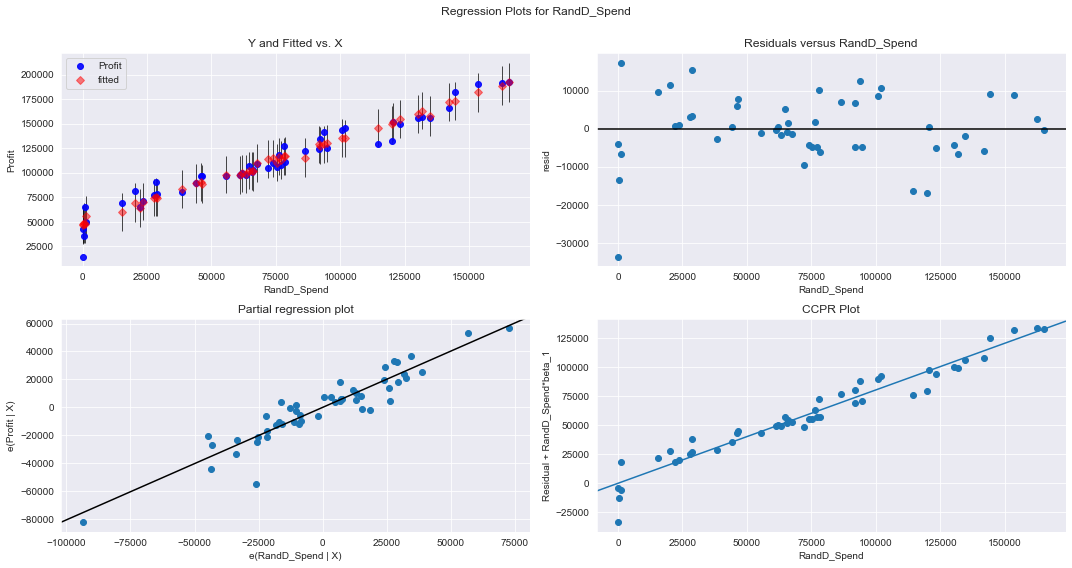

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "RandD_Spend", fig=fig)
plt.show()

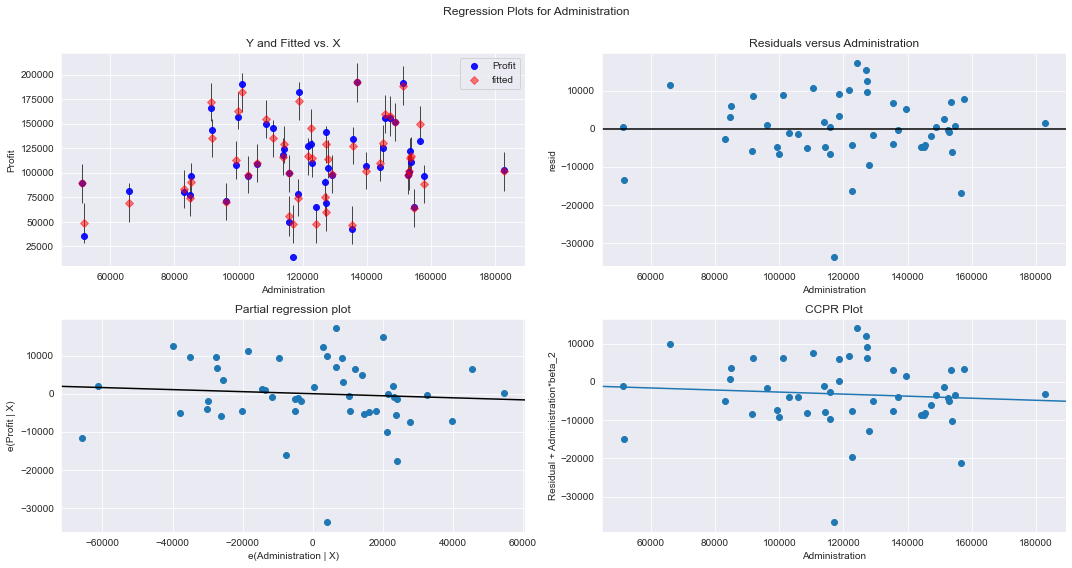

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Administration", fig=fig)
plt.show()

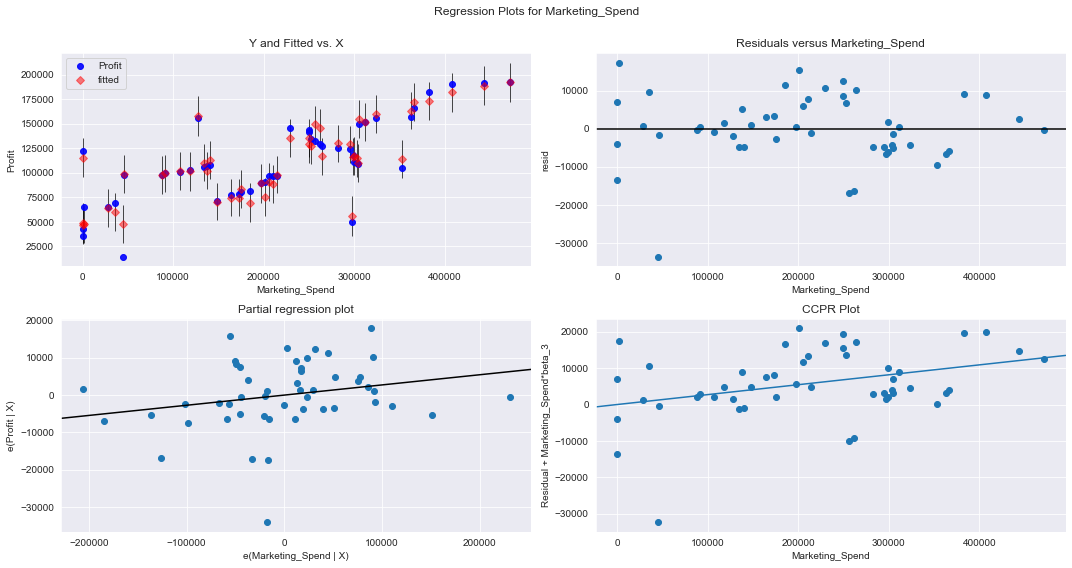

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(module, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

In [29]:
module_influence = module.get_influence()
(c, _) = module_influence.cooks_distance

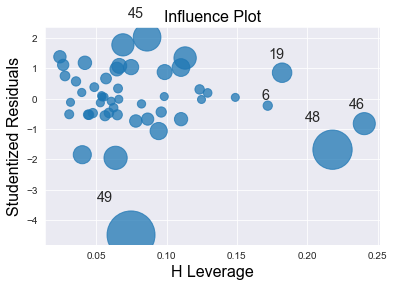

In [30]:
influence_plot(module)
plt.show()

In [31]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [32]:
(module.rsquared,module.aic)

(0.9507459940683246, 1058.7714985998055)

In [33]:

module.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv("https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/ToyotaCorolla.csv", encoding = 'latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [38]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [39]:
df.corr()  #Correlation

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

In [41]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

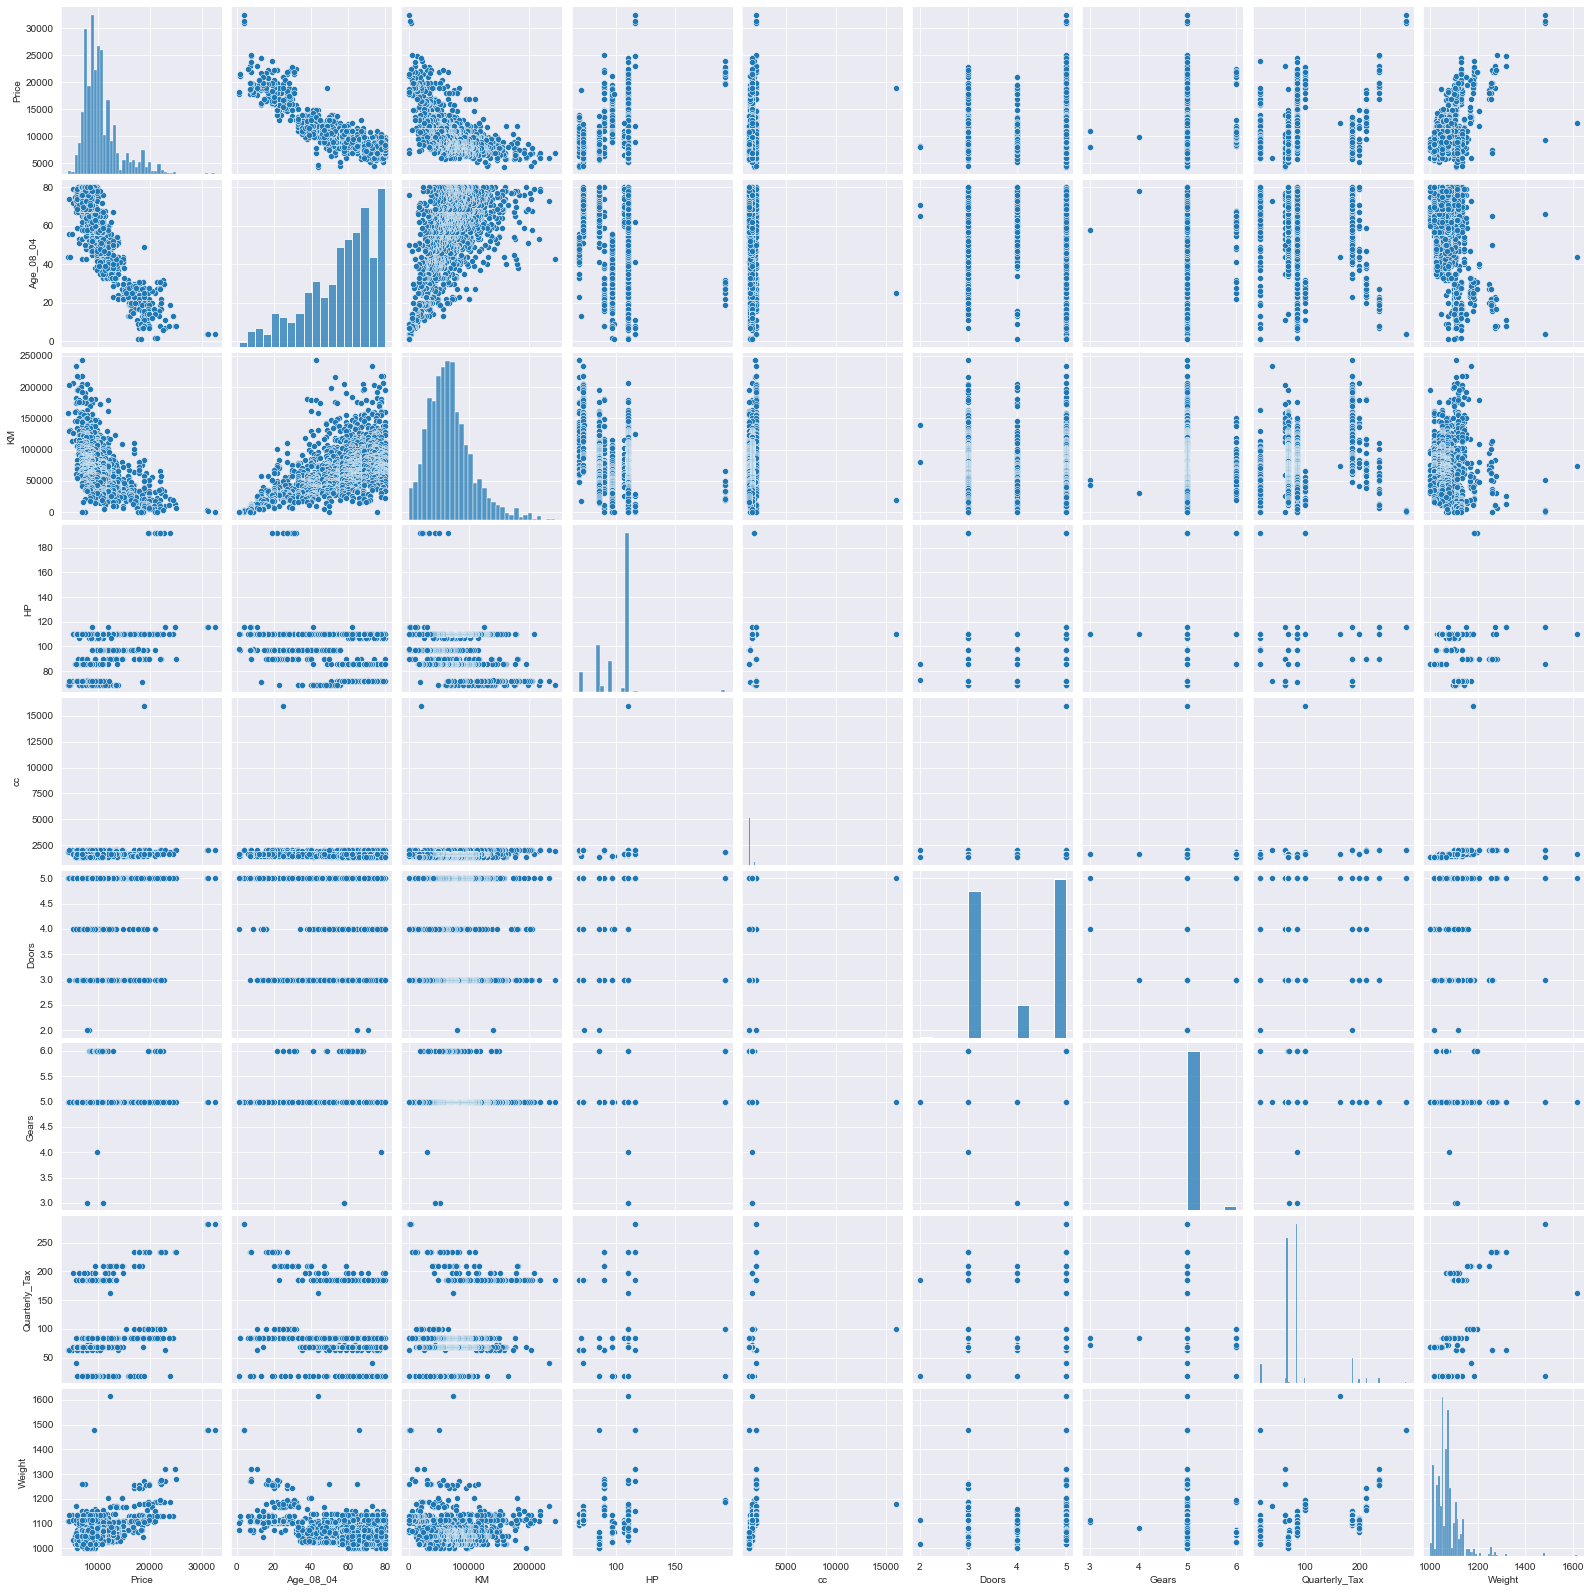

In [42]:
sns.pairplot(df)

In [43]:
#check for missing values
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [44]:
df.corr()  #Correlation

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

<AxesSubplot:>

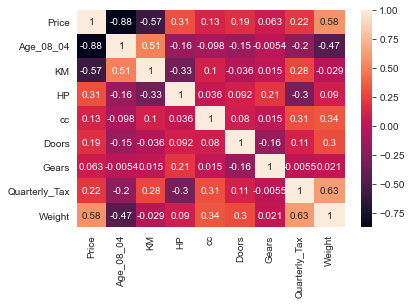

In [47]:
sns.heatmap(df.corr(),annot=True)

In [49]:
#Build model
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [50]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [51]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [52]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Subset Selection

In [57]:
ml_v=smf.ols('Price~Doors',data =df ).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [58]:
ml_v=smf.ols('Price~cc',data =df ).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [60]:
ml_v=smf.ols('Price~cc+Doors',data =df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Calculate VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [64]:
df.values

array([[13500,    23, 46986, ...,     5,   210,  1165],
       [13750,    23, 72937, ...,     5,   210,  1165],
       [13950,    24, 41711, ...,     5,   210,  1165],
       ...,
       [ 8500,    71, 17016, ...,     5,    69,  1015],
       [ 7250,    70, 16916, ...,     5,    69,  1015],
       [ 6950,    76,     1, ...,     5,    19,  1114]], dtype=int64)

In [66]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [67]:
vif['Features'] = df.columns
vif

Features
0          Price
1      Age_08_04
2             KM
3             HP
4             cc
5          Doors
6          Gears
7  Quarterly_Tax
8         Weight

In [68]:
range(len(df.columns))

range(0, 9)

In [71]:
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif

Features         VIF
0          Price   70.862202
1      Age_08_04   46.606327
2             KM    9.003629
3             HP   71.409893
4             cc   17.215428
5          Doors   21.875191
6          Gears  438.717651
7  Quarterly_Tax   11.194050
8         Weight  668.521609

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:35:33   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis

In [73]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

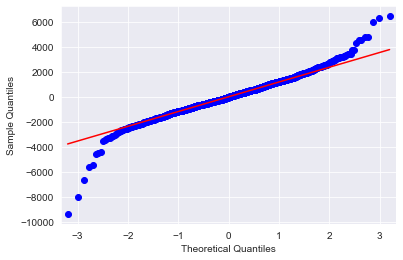

In [74]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [75]:
#get index for higher residuals
np.argmax(model.resid), np.max(model.resid)

(523, 6444.021866864216)

# Residual Plot for Homoscedasticity

In [76]:
model.fittedvalues, model.resid

(0       16812.580505
 1       16272.355186
 2       16800.732460
 3       16426.496731
 4       16222.419010
             ...     
 1431     8793.758297
 1432     8291.338421
 1433     8454.298007
 1434     8578.038121
 1435    10402.438333
 Length: 1436, dtype: float64,
 0      -3312.580505
 1      -2522.355186
 2      -2850.732460
 3      -1476.496731
 4      -2472.419010
            ...     
 1431   -1293.758297
 1432    2553.661579
 1433      45.701993
 1434   -1328.038121
 1435   -3452.438333
 Length: 1436, dtype: float64)

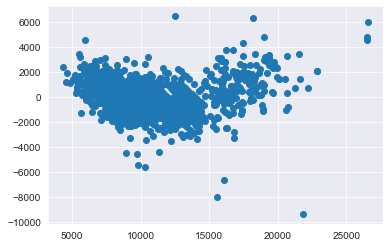

In [77]:
plt.scatter(model.fittedvalues, model.resid)

<AxesSubplot:ylabel='Density'>

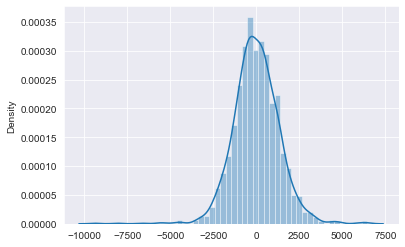

In [80]:
sns.distplot(model.resid)

# Residual VS Regressor

In [84]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

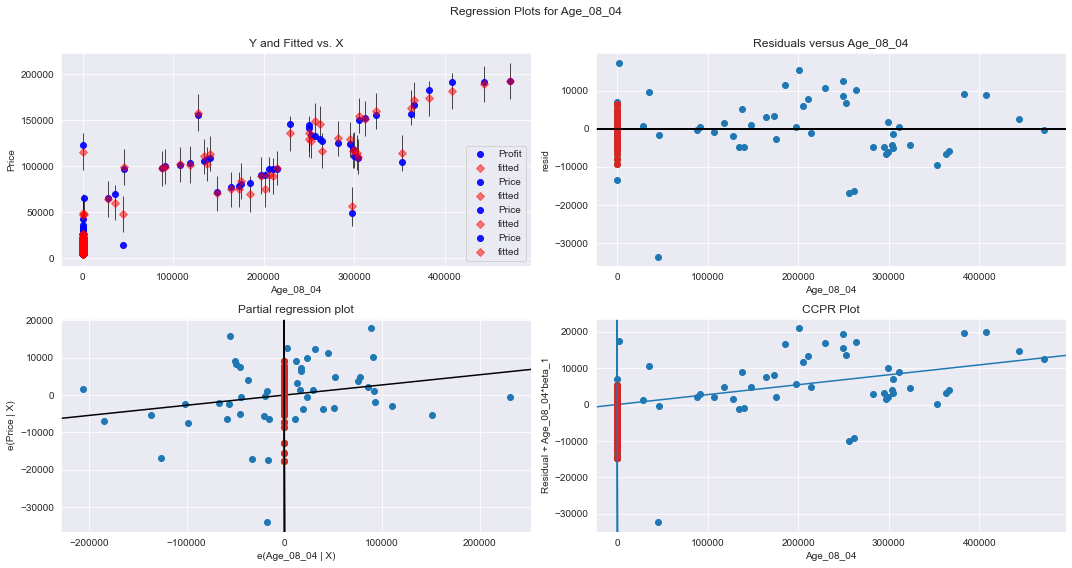

In [85]:
sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)

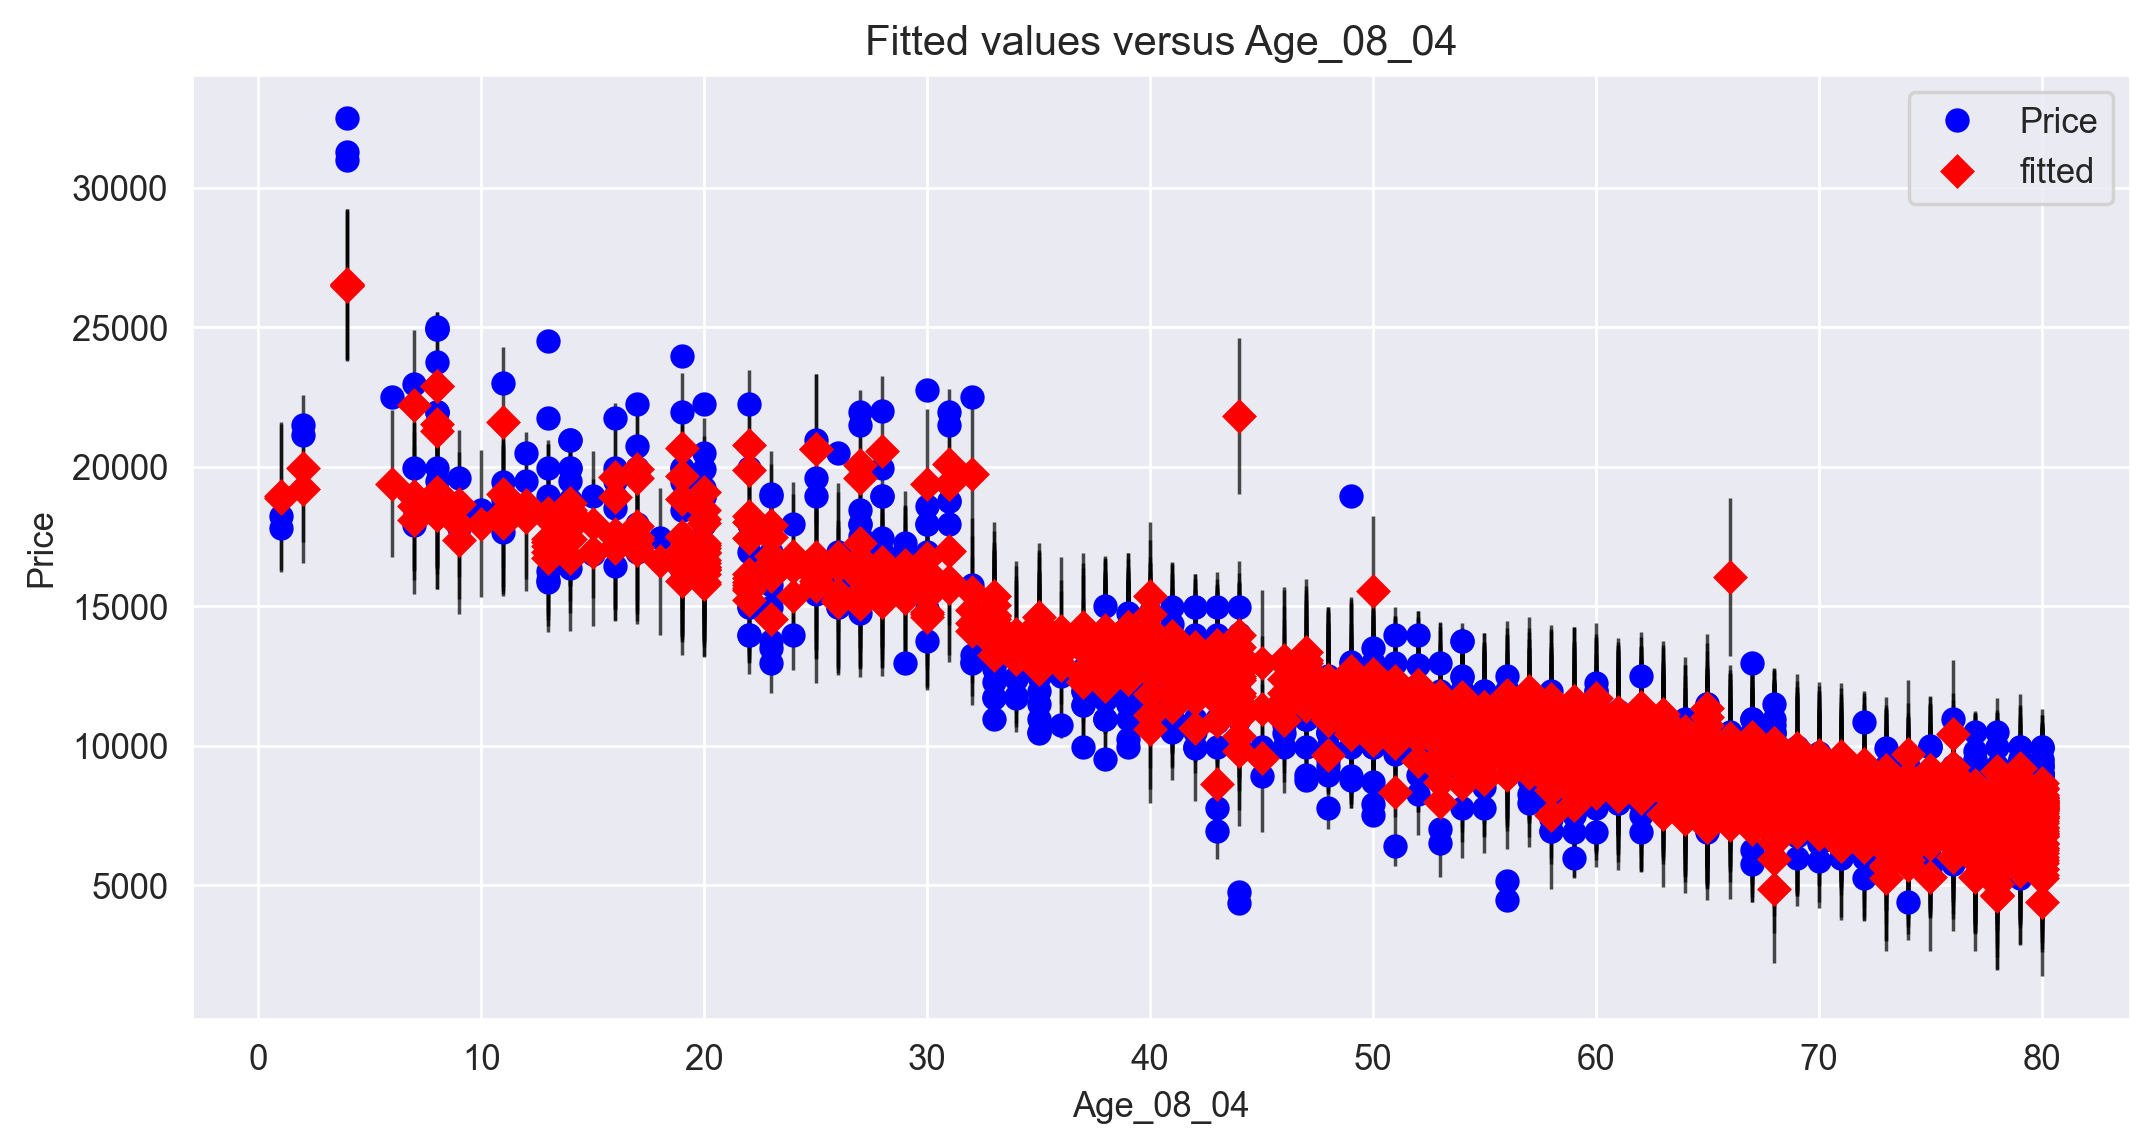

In [86]:
sm.graphics.plot_fit(model,'Age_08_04');

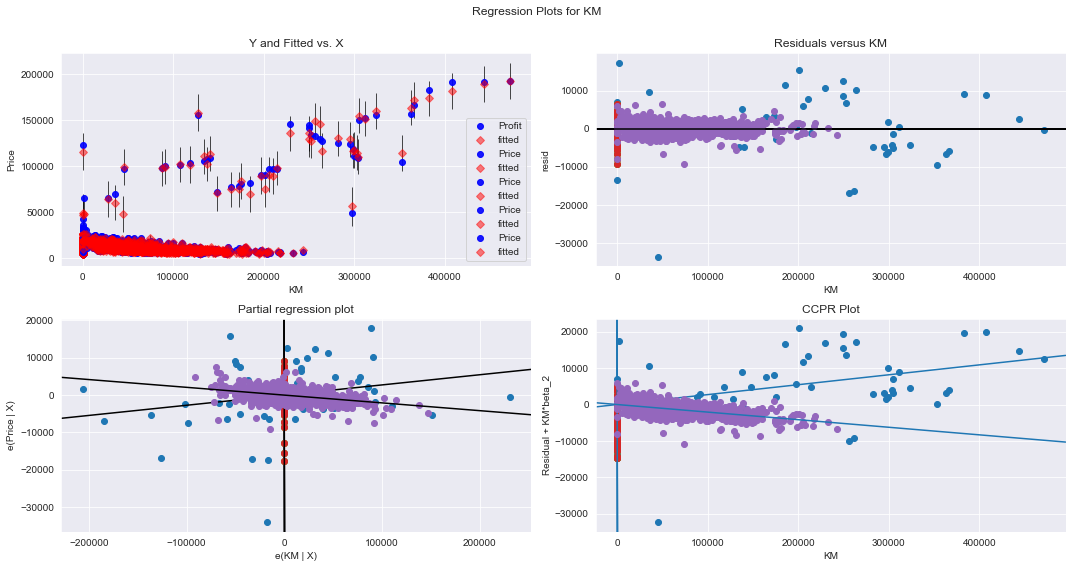

In [87]:
sm.graphics.plot_regress_exog(model, "KM", fig=fig)

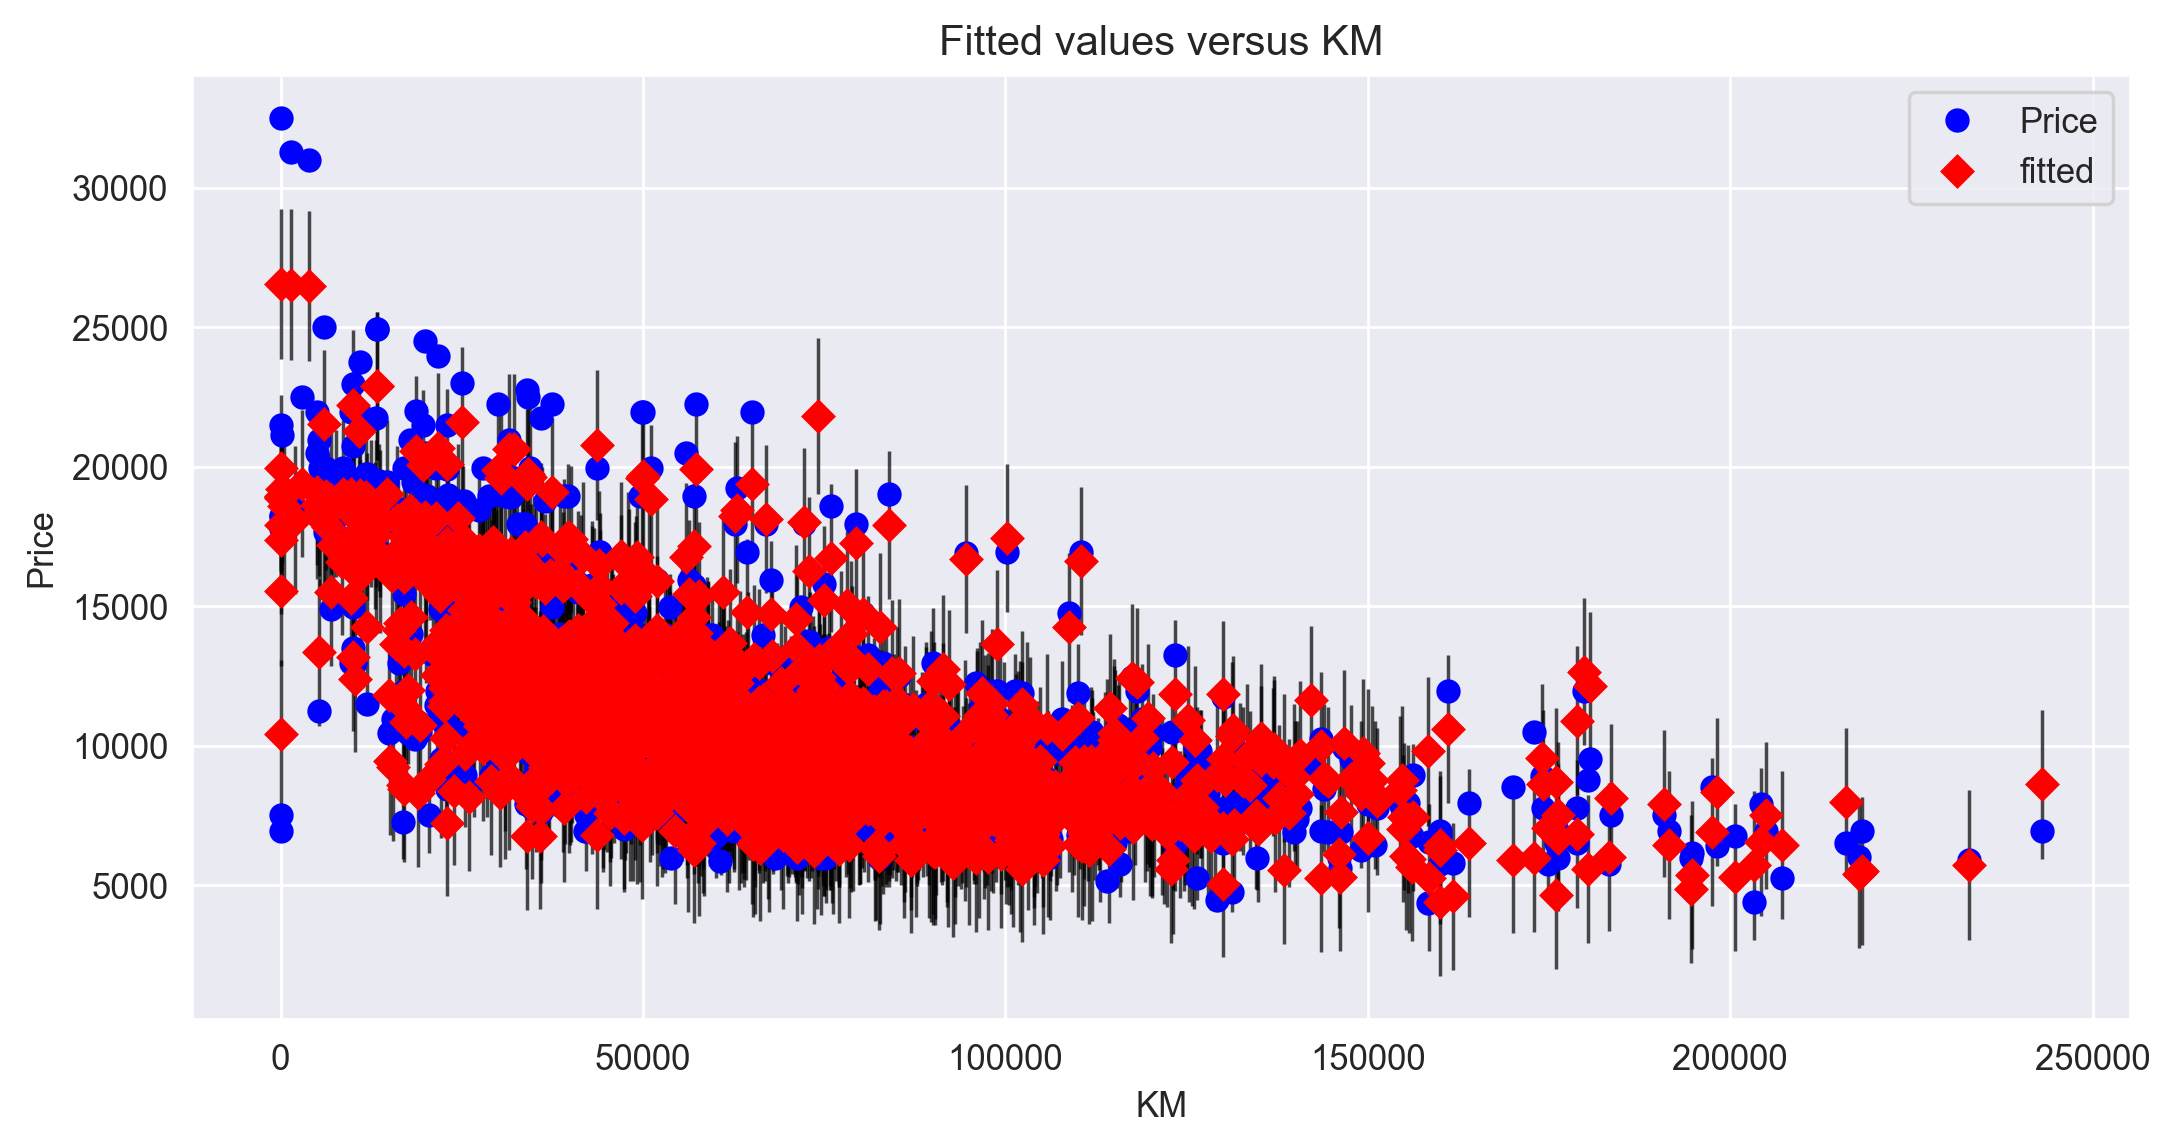

In [88]:
sm.graphics.plot_fit(model,"KM");

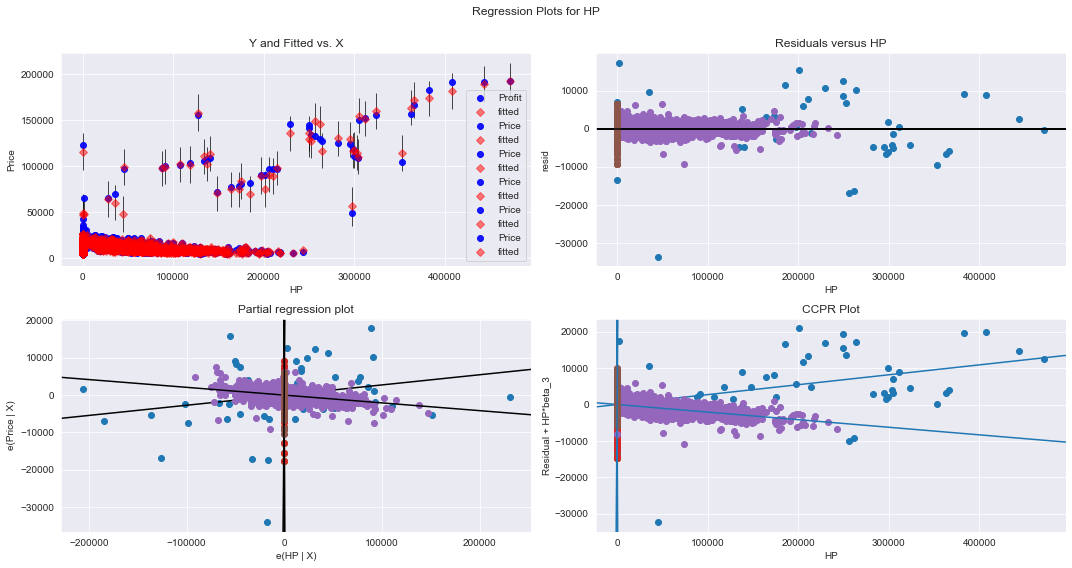

In [89]:
sm.graphics.plot_regress_exog(model, "HP", fig=fig)

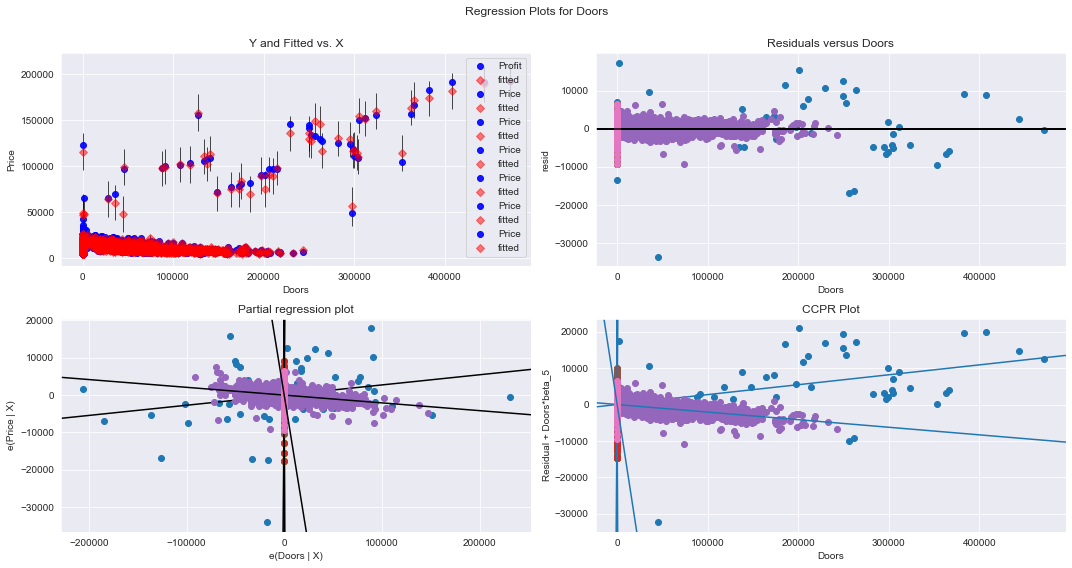

In [90]:
sm.graphics.plot_regress_exog(model, "Doors", fig=fig)

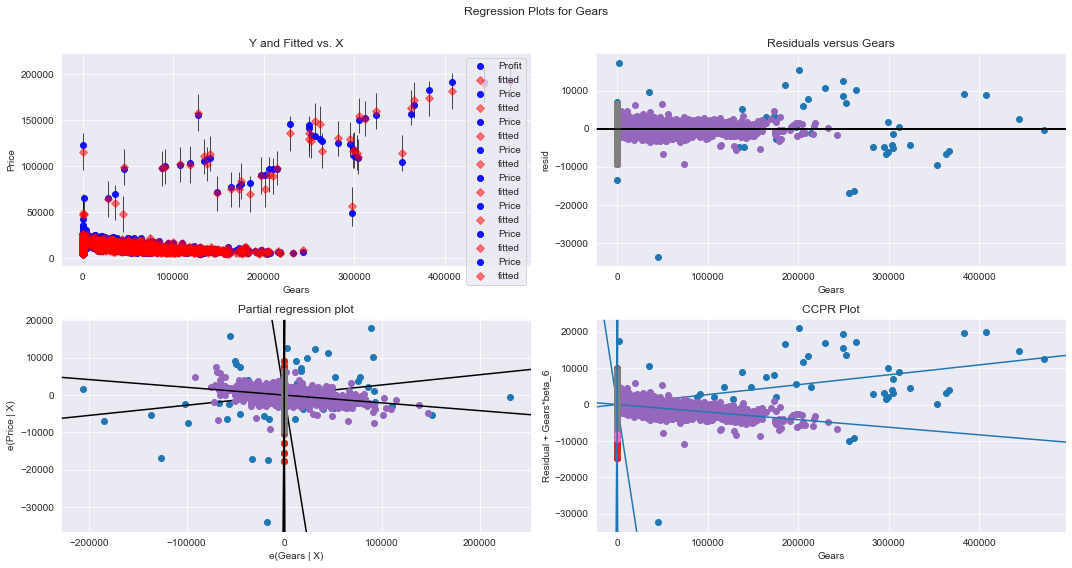

In [91]:
sm.graphics.plot_regress_exog(model, "Gears", fig=fig)

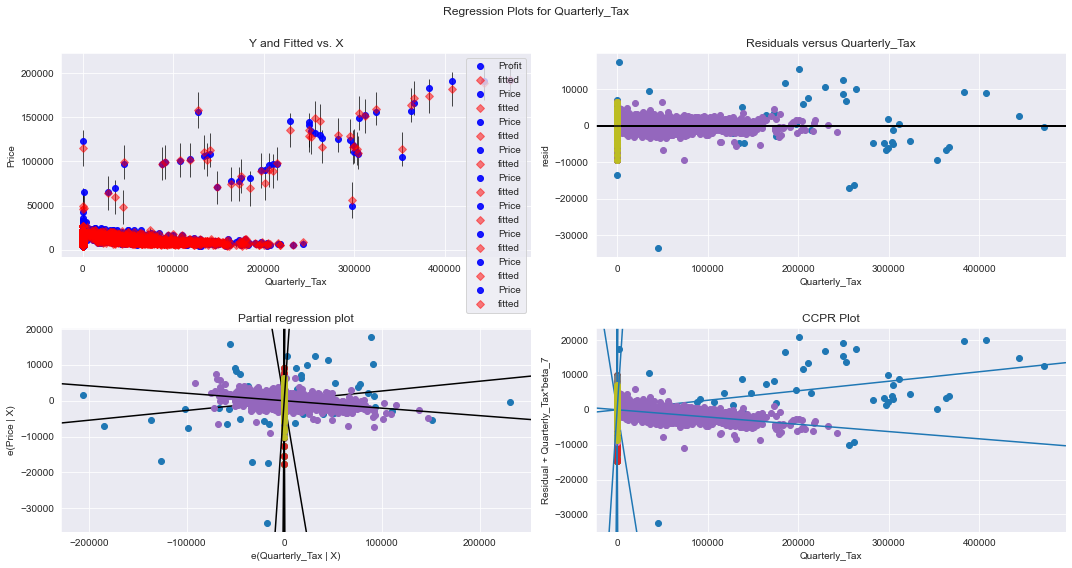

In [92]:
sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)

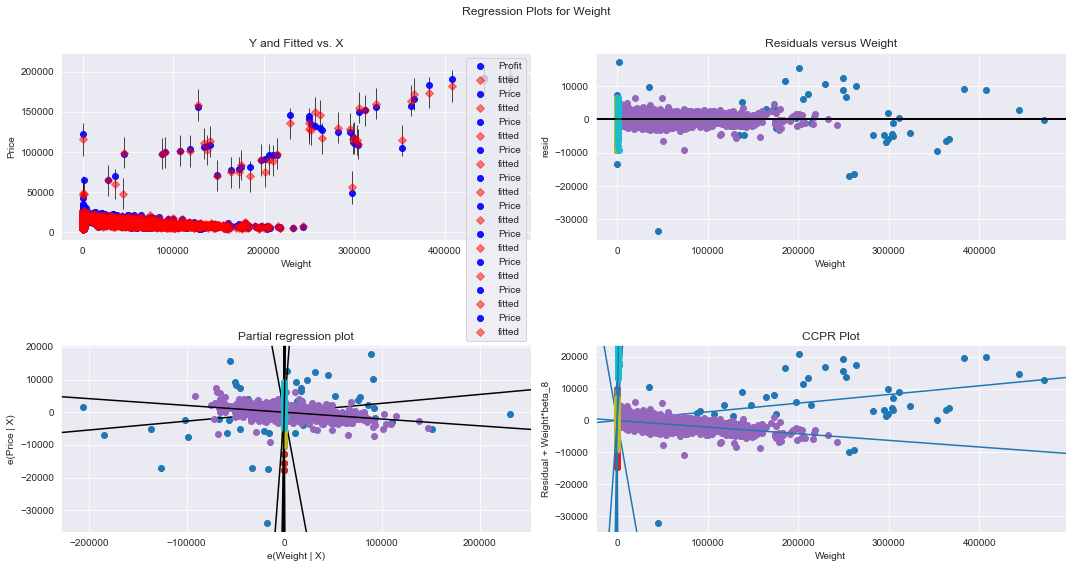

In [93]:
sm.graphics.plot_regress_exog(model, "Weight", fig=fig)

# MODEL DELETION TECHNIQUES

# Detecting Influencers/Outliers
Cook's Distance

In [94]:
model

In [97]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [98]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<StemContainer object of 3 artists>

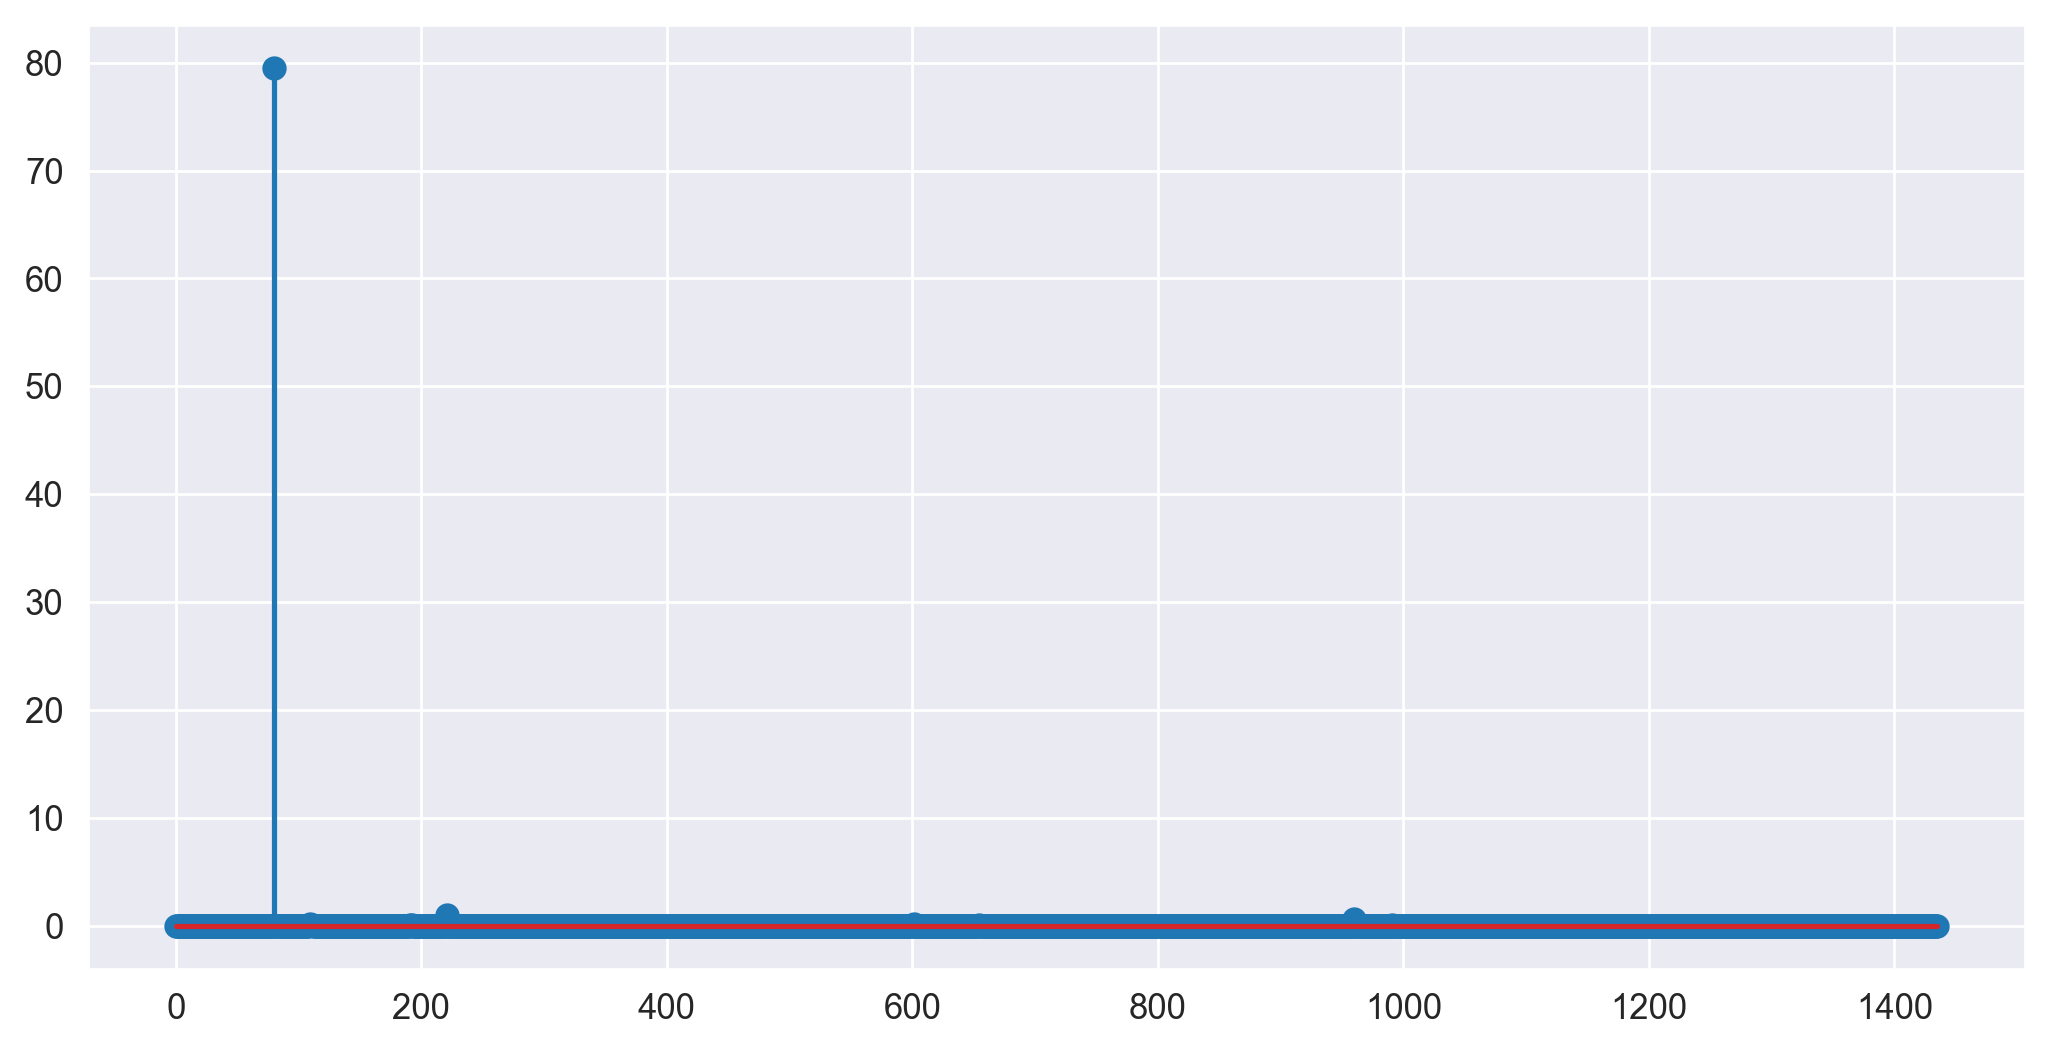

In [99]:
# Cook's distance plot
plt.stem(c)

In [100]:
np.argmax(c), np.max(c)

(80, 79.52010624139518)

In [101]:
df.iloc[[80]]

Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
80  18950         25  20019  110  16000      5      5            100    1180

In [102]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

# From the above plot, it is evident that data point 80 is the influencers

In [103]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

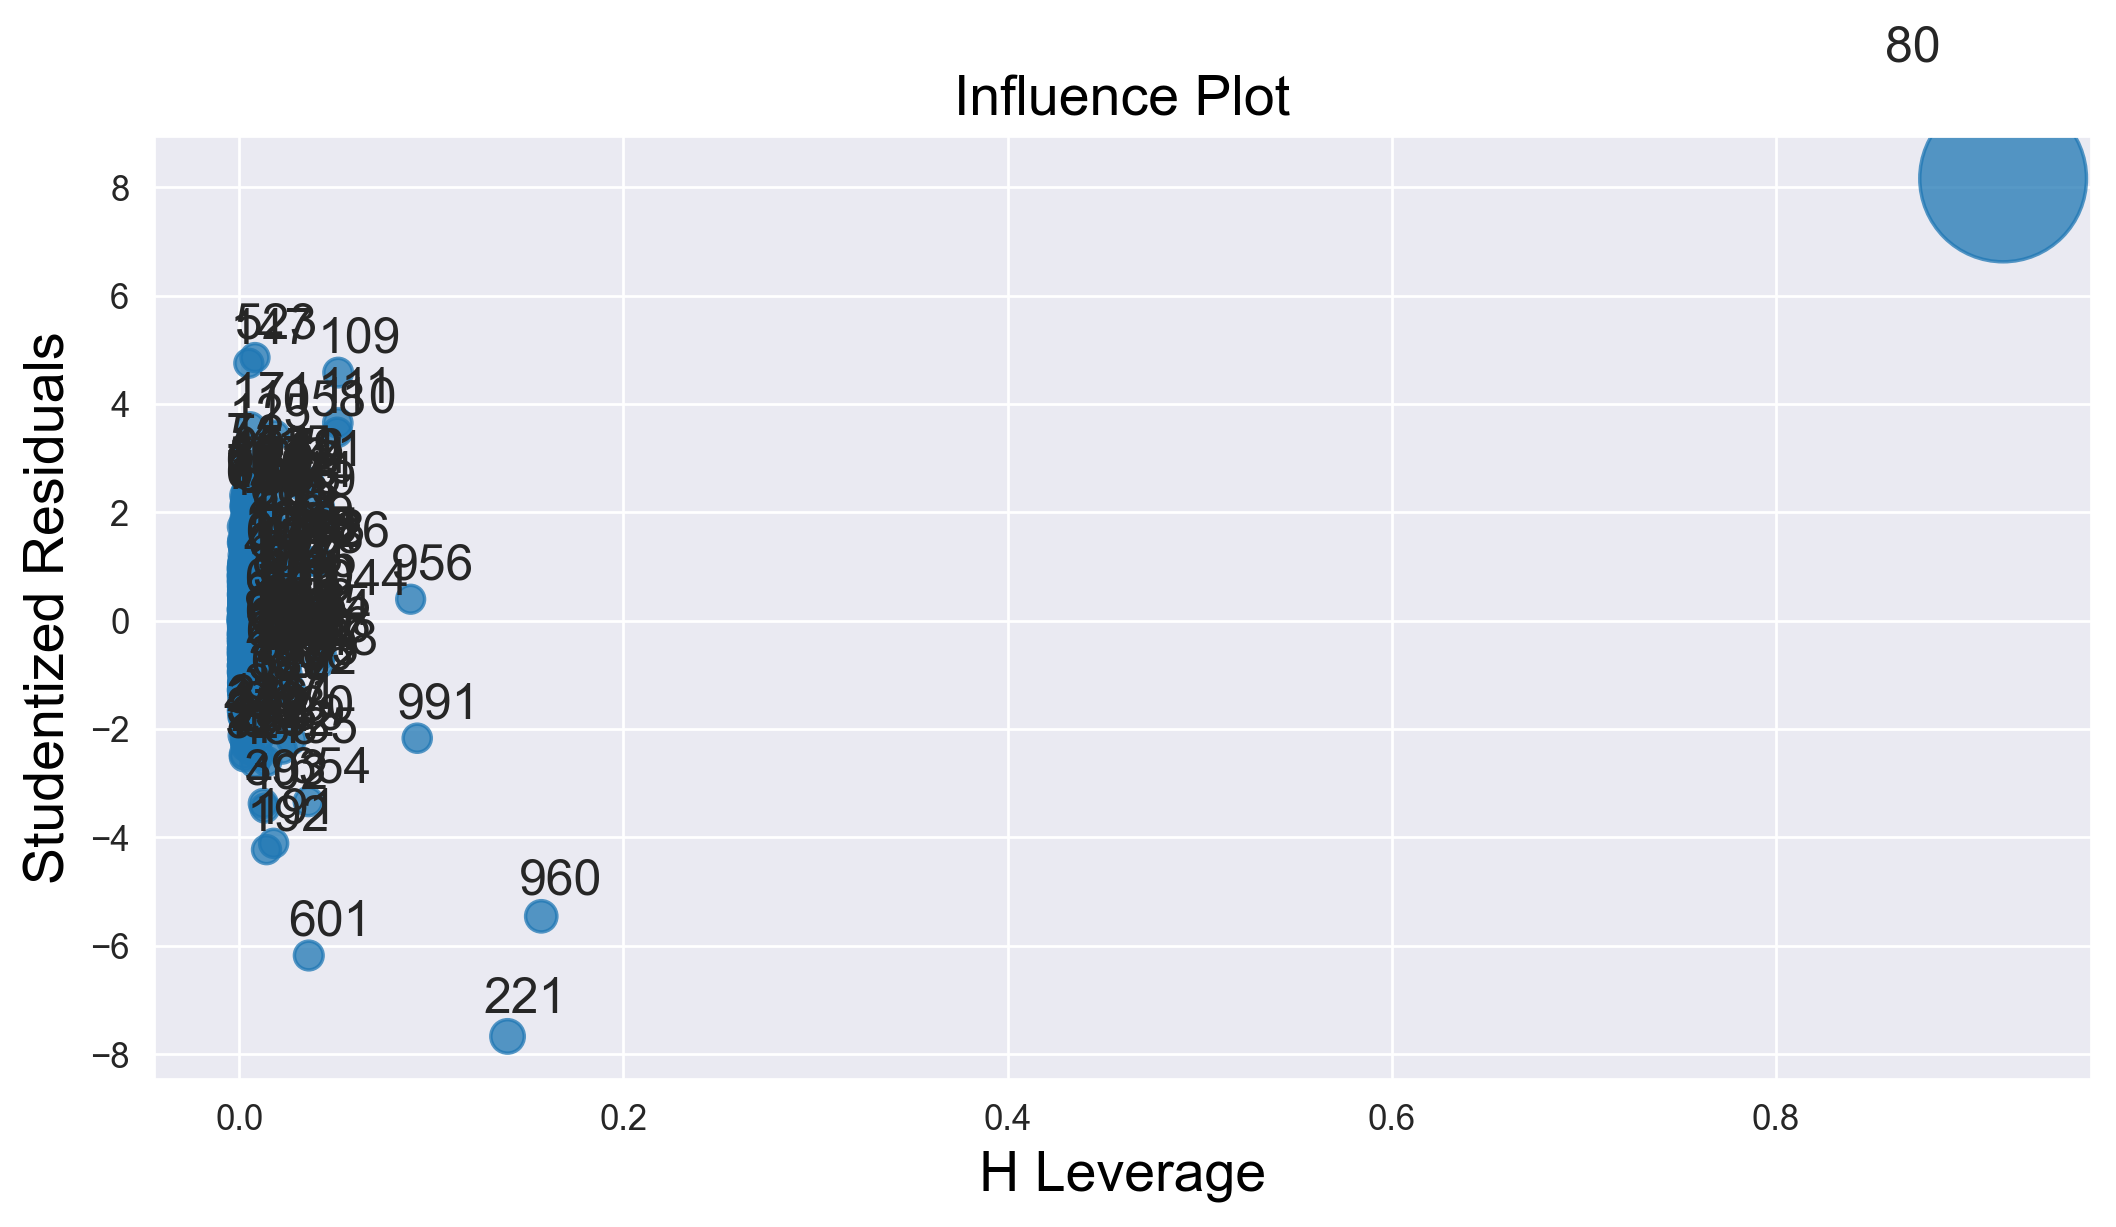

In [104]:
influence_plot(model);

In [105]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.020891364902506964

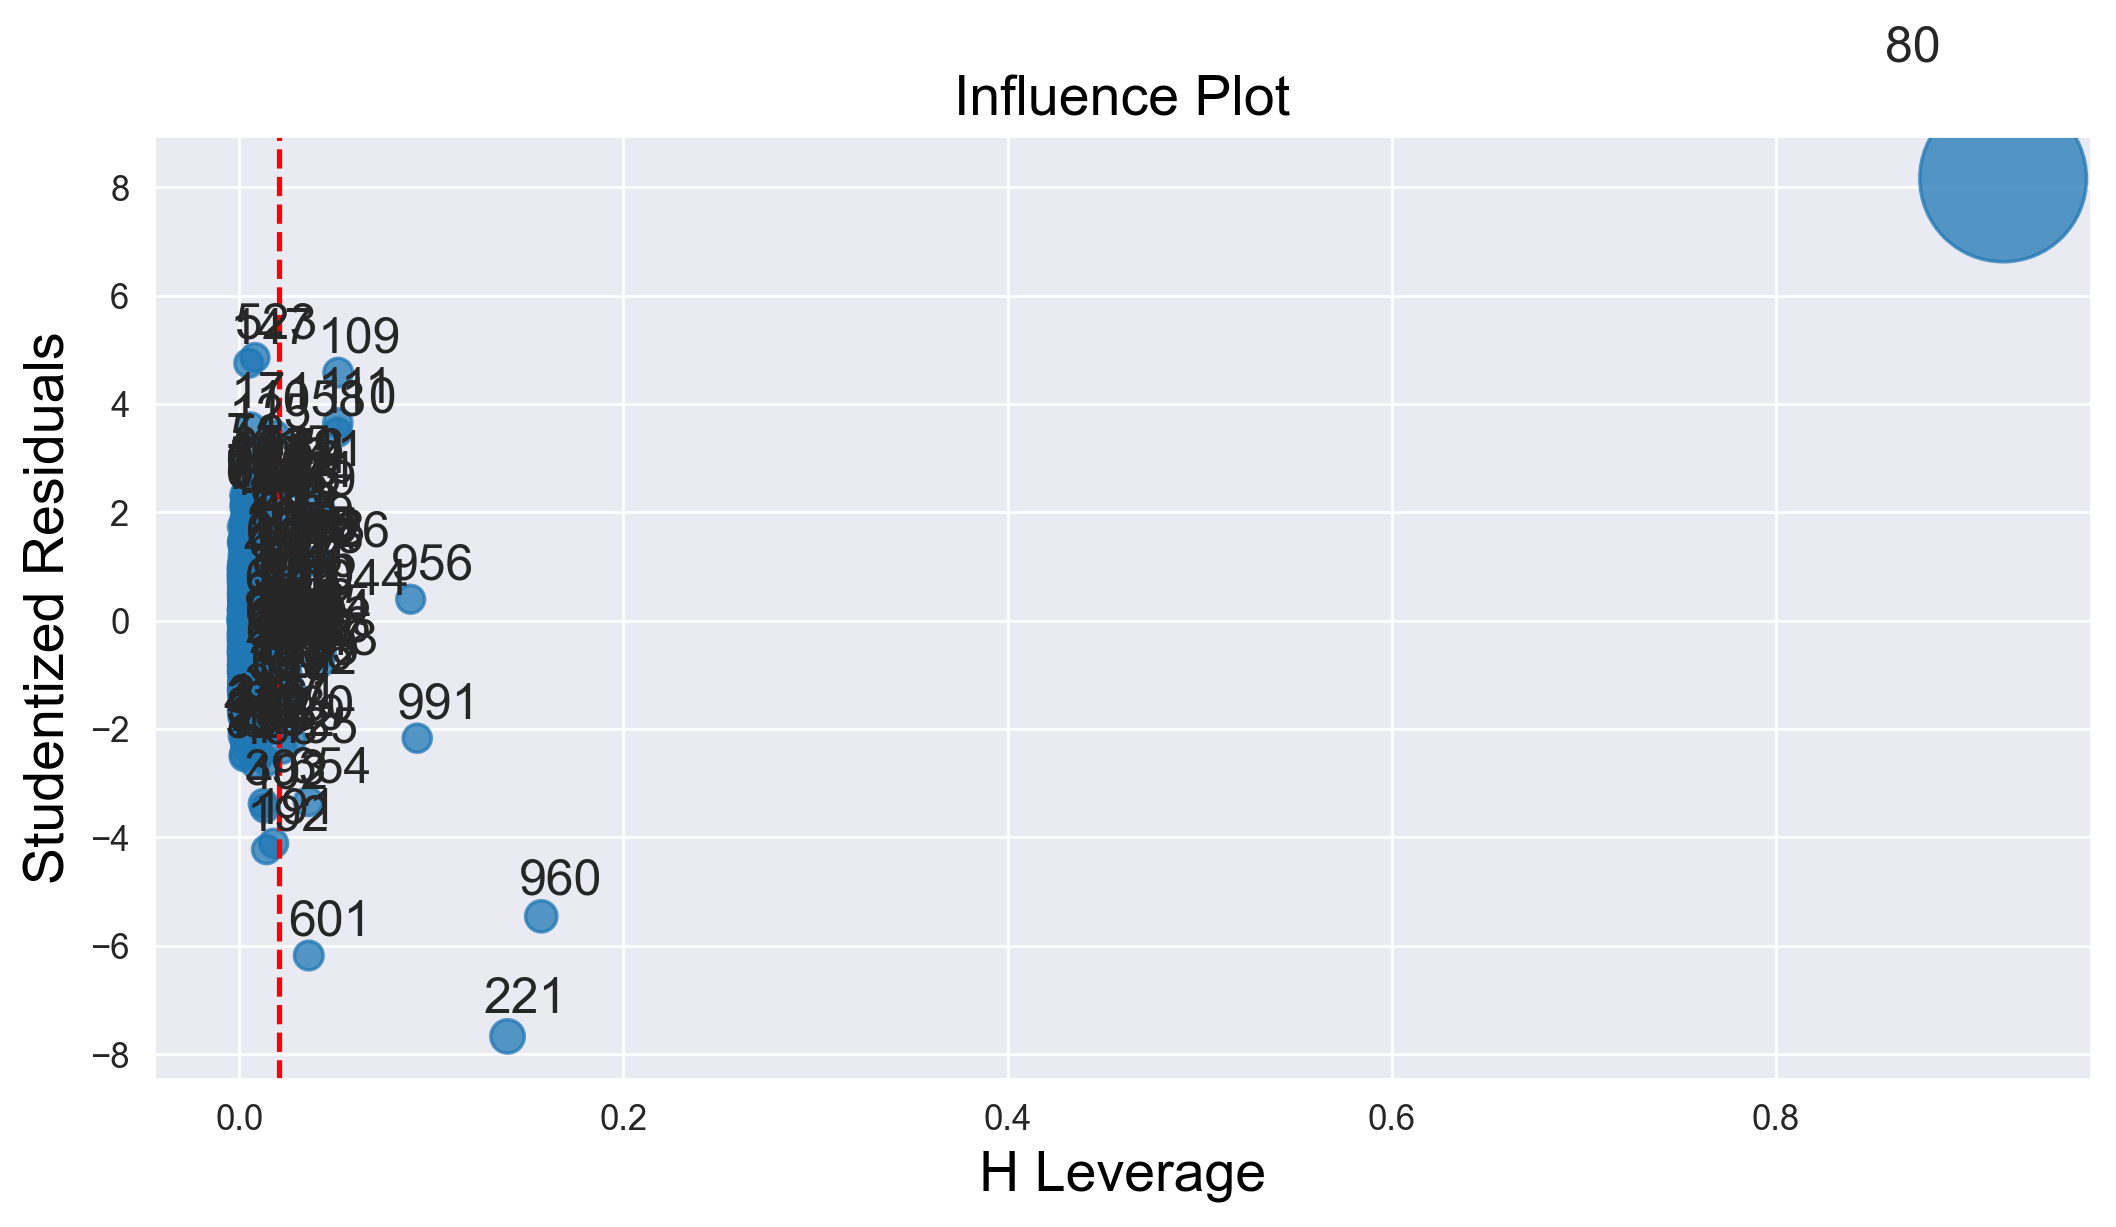

In [106]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving the Model

In [107]:
df.drop(index=80,inplace=True)

In [108]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [109]:
#reset the index
df.reset_index(inplace=True)
df

index  Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0         0  13500         23  46986   90  2000      3      5            210   
1         1  13750         23  72937   90  2000      3      5            210   
2         2  13950         24  41711   90  2000      3      5            210   
3         3  14950         26  48000   90  2000      3      5            210   
4         4  13750         30  38500   90  2000      3      5            210   
...     ...    ...        ...    ...  ...   ...    ...    ...            ...   
1430   1431   7500         69  20544   86  1300      3      5             69   
1431   1432  10845         72  19000   86  1300      3      5             69   
1432   1433   8500         71  17016   86  1300      3      5             69   
1433   1434   7250         70  16916   86  1300      3      5             69   
1434   1435   6950         76      1  110  1600      5      5             19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1430    1025  
1431    1015  
1432    1015  
1433    1015  
1434    1114  

[1435 rows x 10 columns]

In [111]:
#Build the model on the new data
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =df).fit()

In [117]:
dfnew=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [118]:
dfnew

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [121]:
dfnew.iloc[[80]]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
80  17250         29  20000  110  1600      5      5             85    1115

In [123]:
# generate R-Squared and AIC values
final_ml= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =dfnew).fit()

In [125]:
(final_ml.rsquared,final_ml.aic)

(0.8693790488655818, 24687.28102432684)

# Cook's Distance

In [126]:
model_influence = final_ml.get_influence()
(c_, _) = model_influence.cooks_distance

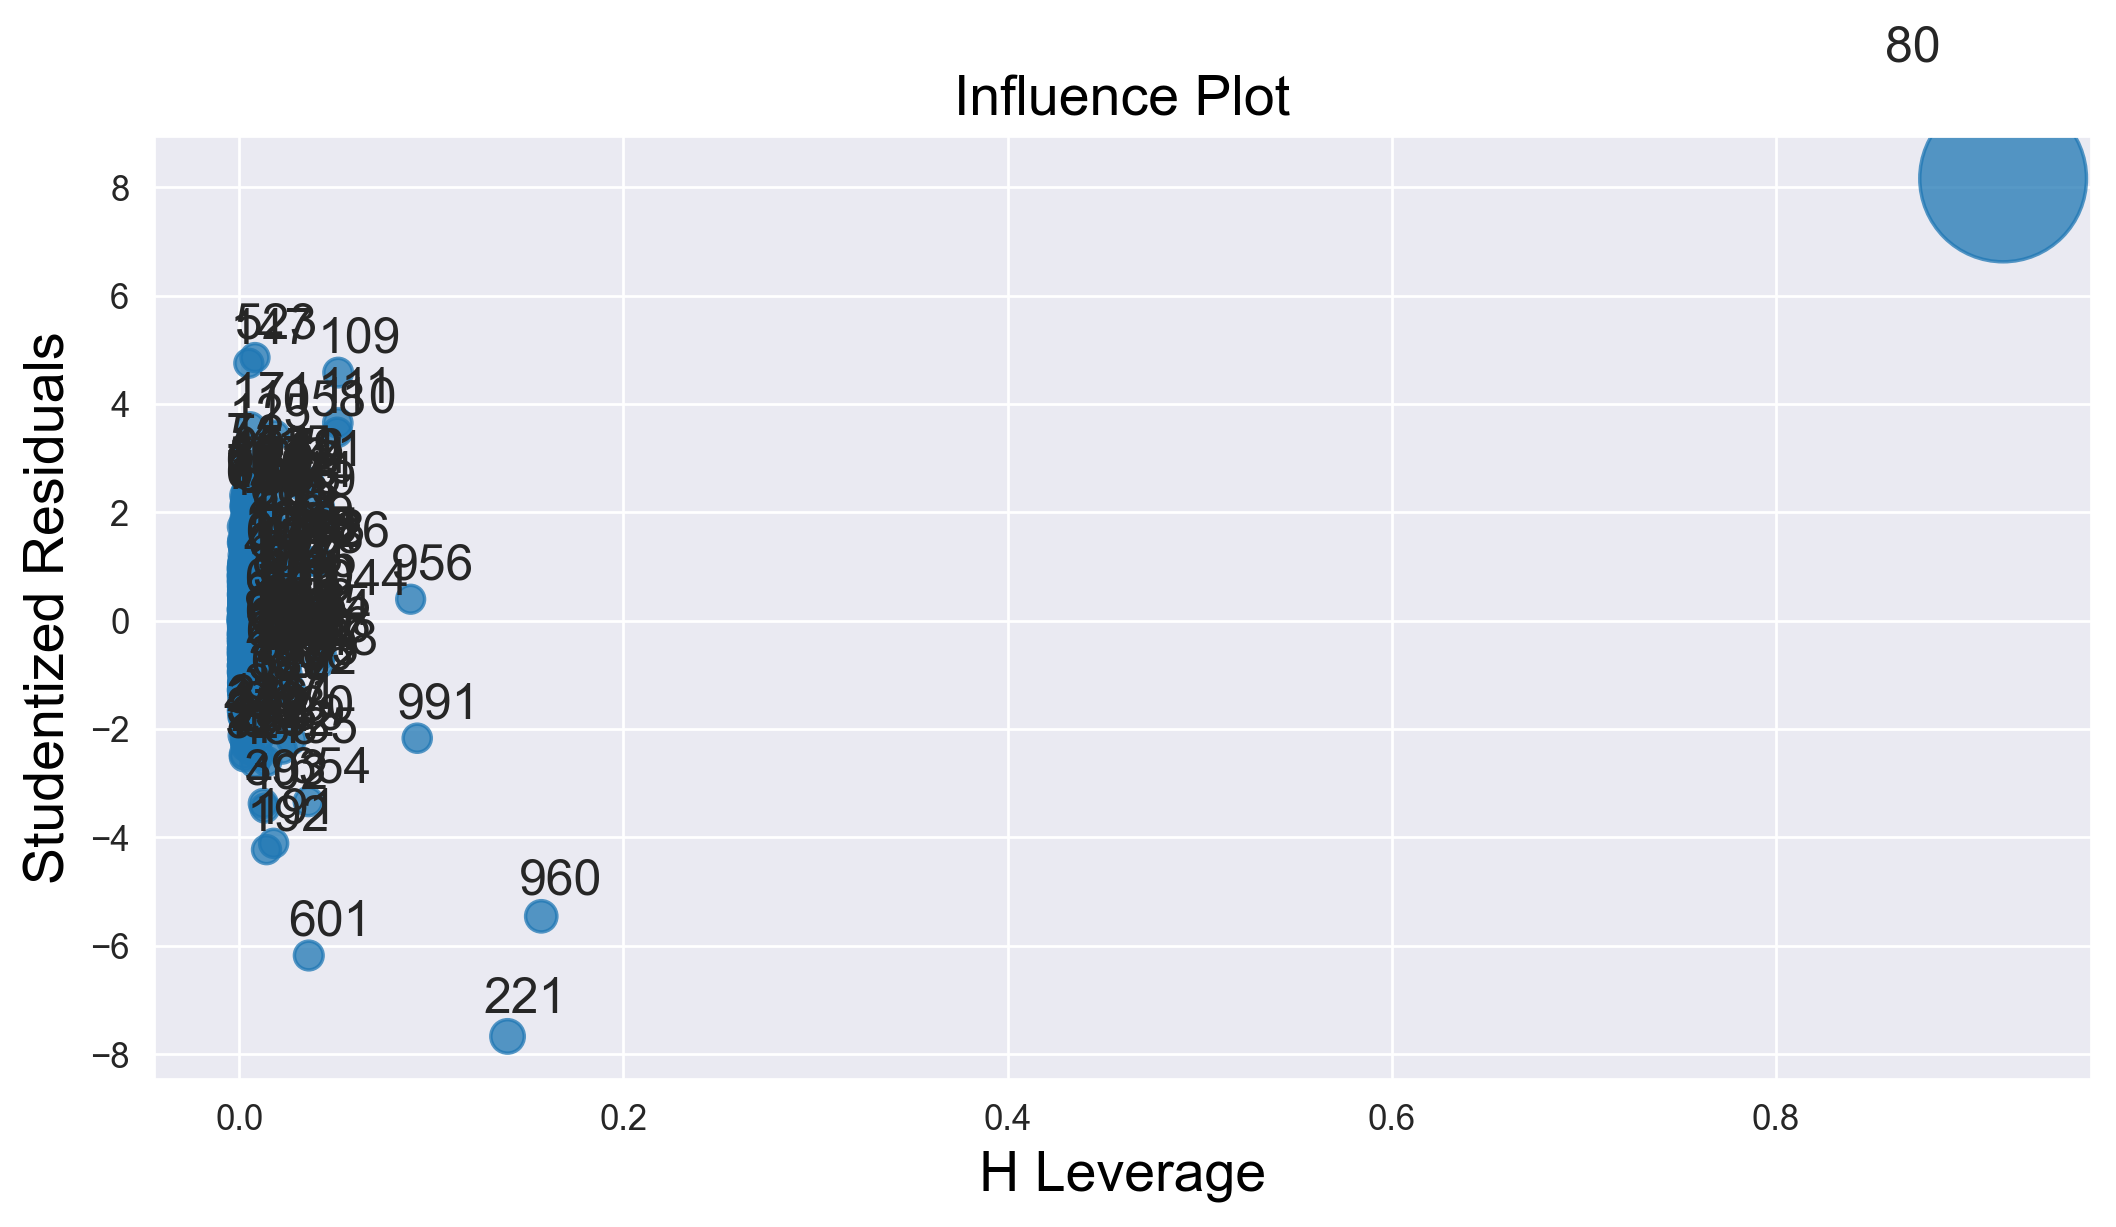

In [127]:
influence_plot(model);

In [128]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(220, 2.2244611713002116)

In [130]:
#Drop 220 observations
dfnew2=dfnew.drop(dfnew.index[[220]],axis=0)
dfnew2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

In [131]:
#Reset the index and re arrange the row values
dfnew3=dfnew2.reset_index()

In [132]:
dfnew4=dfnew3.drop(['index'],axis=1)
dfnew4

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1429   7500         69  20544   86  1300      3      5             69    1025
1430  10845         72  19000   86  1300      3      5             69    1015
1431   8500         71  17016   86  1300      3      5             69    1015
1432   7250         70  16916   86  1300      3      5             69    1015
1433   6950         76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

In [133]:
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =dfnew4).fit()

In [134]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

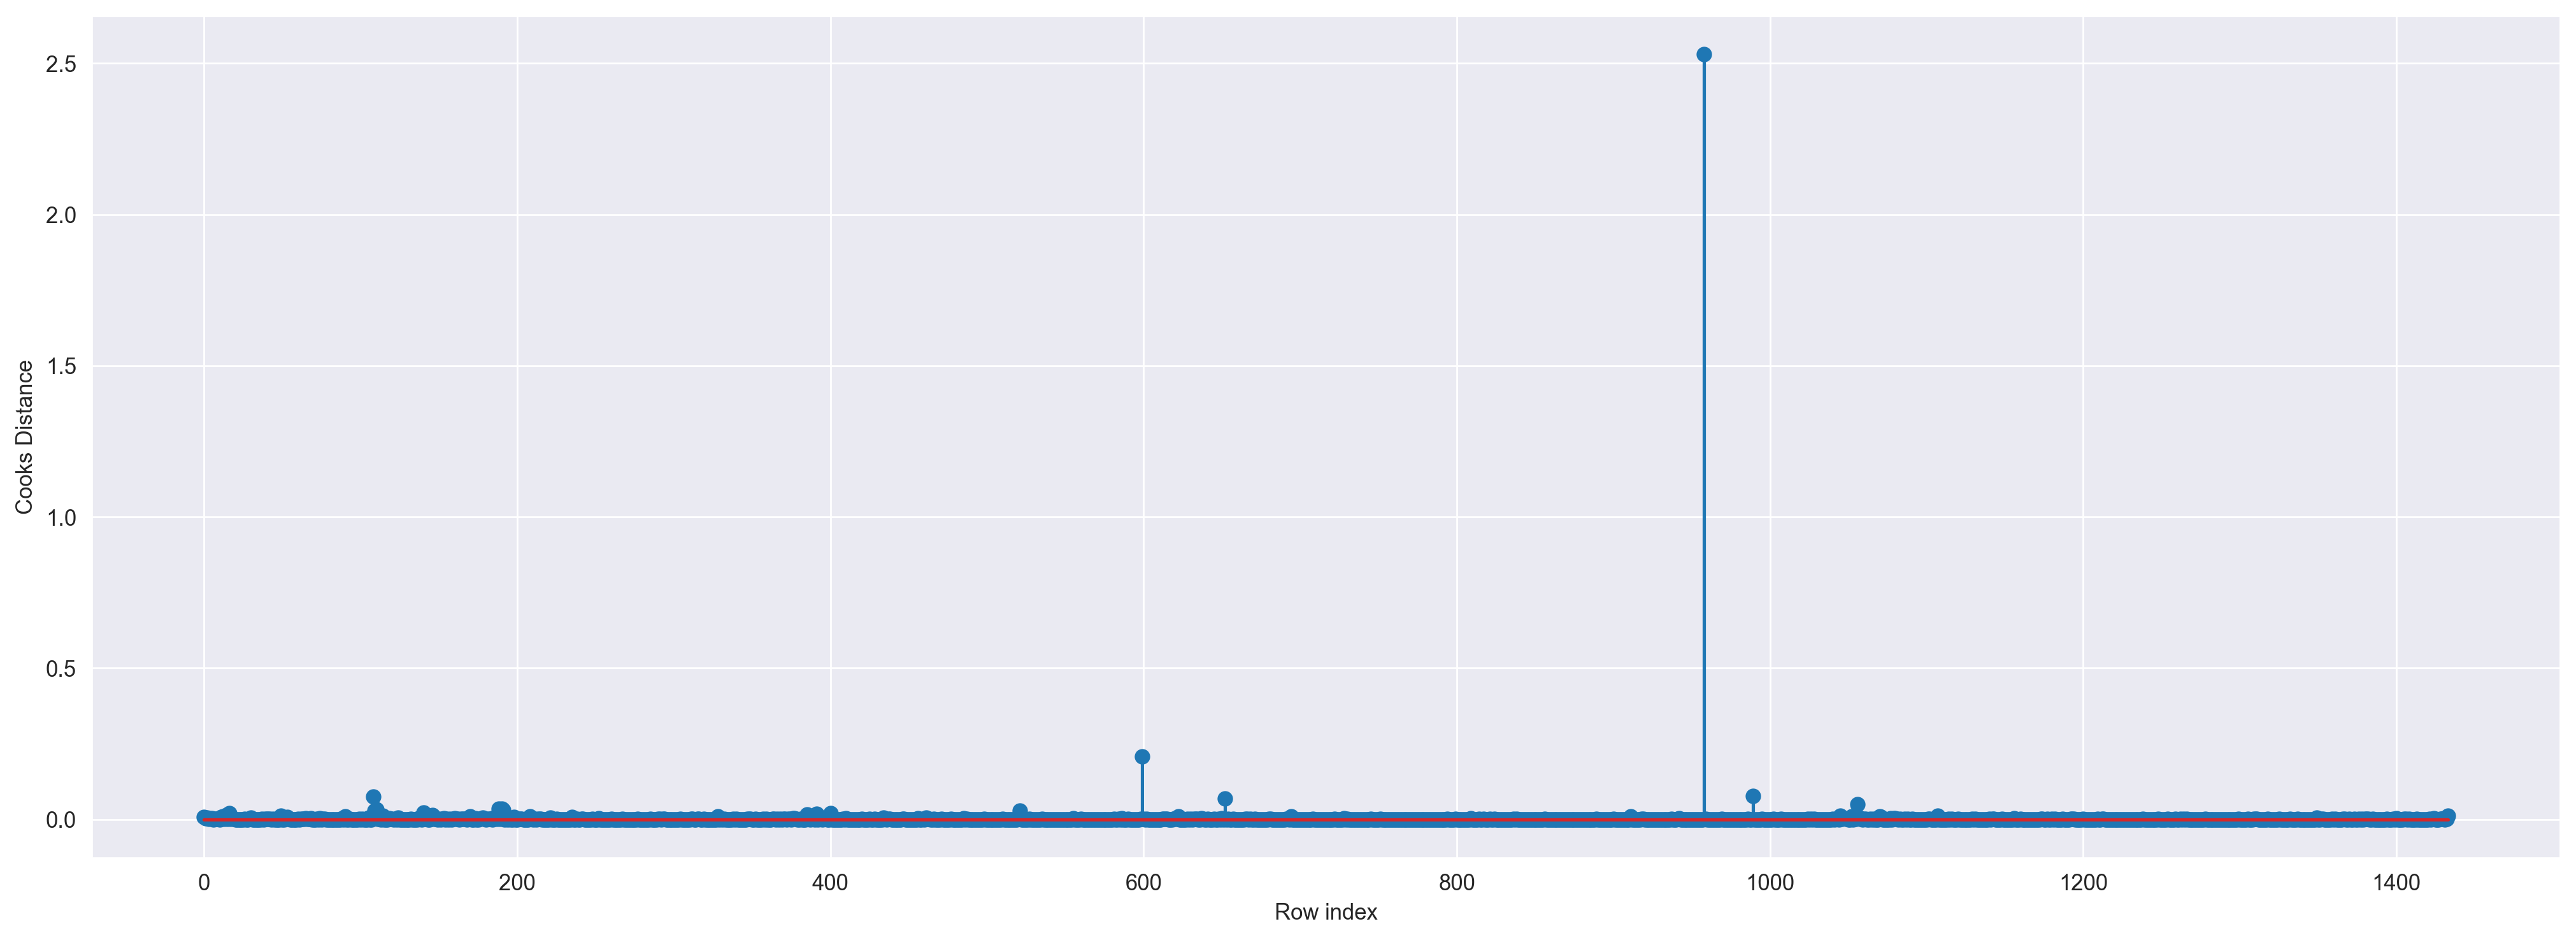

In [137]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfnew4)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [138]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(958, 2.5312566930231593)

In [139]:
#Drop 958 observations
dfnew3=dfnew2.drop(dfnew2.index[[958]],axis=0)
dfnew3

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

In [140]:
#Reset the index and re arrange the row values
dfnew4=dfnew3.reset_index()

In [141]:
dfnew5=dfnew4.drop(['index'],axis=1)
dfnew5

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1428   7500         69  20544   86  1300      3      5             69    1025
1429  10845         72  19000   86  1300      3      5             69    1015
1430   8500         71  17016   86  1300      3      5             69    1015
1431   7250         70  16916   86  1300      3      5             69    1015
1432   6950         76      1  110  1600      5      5             19    1114

[1433 rows x 9 columns]

In [142]:
#Build the model on the new data
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =dfnew5).fit()

In [143]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

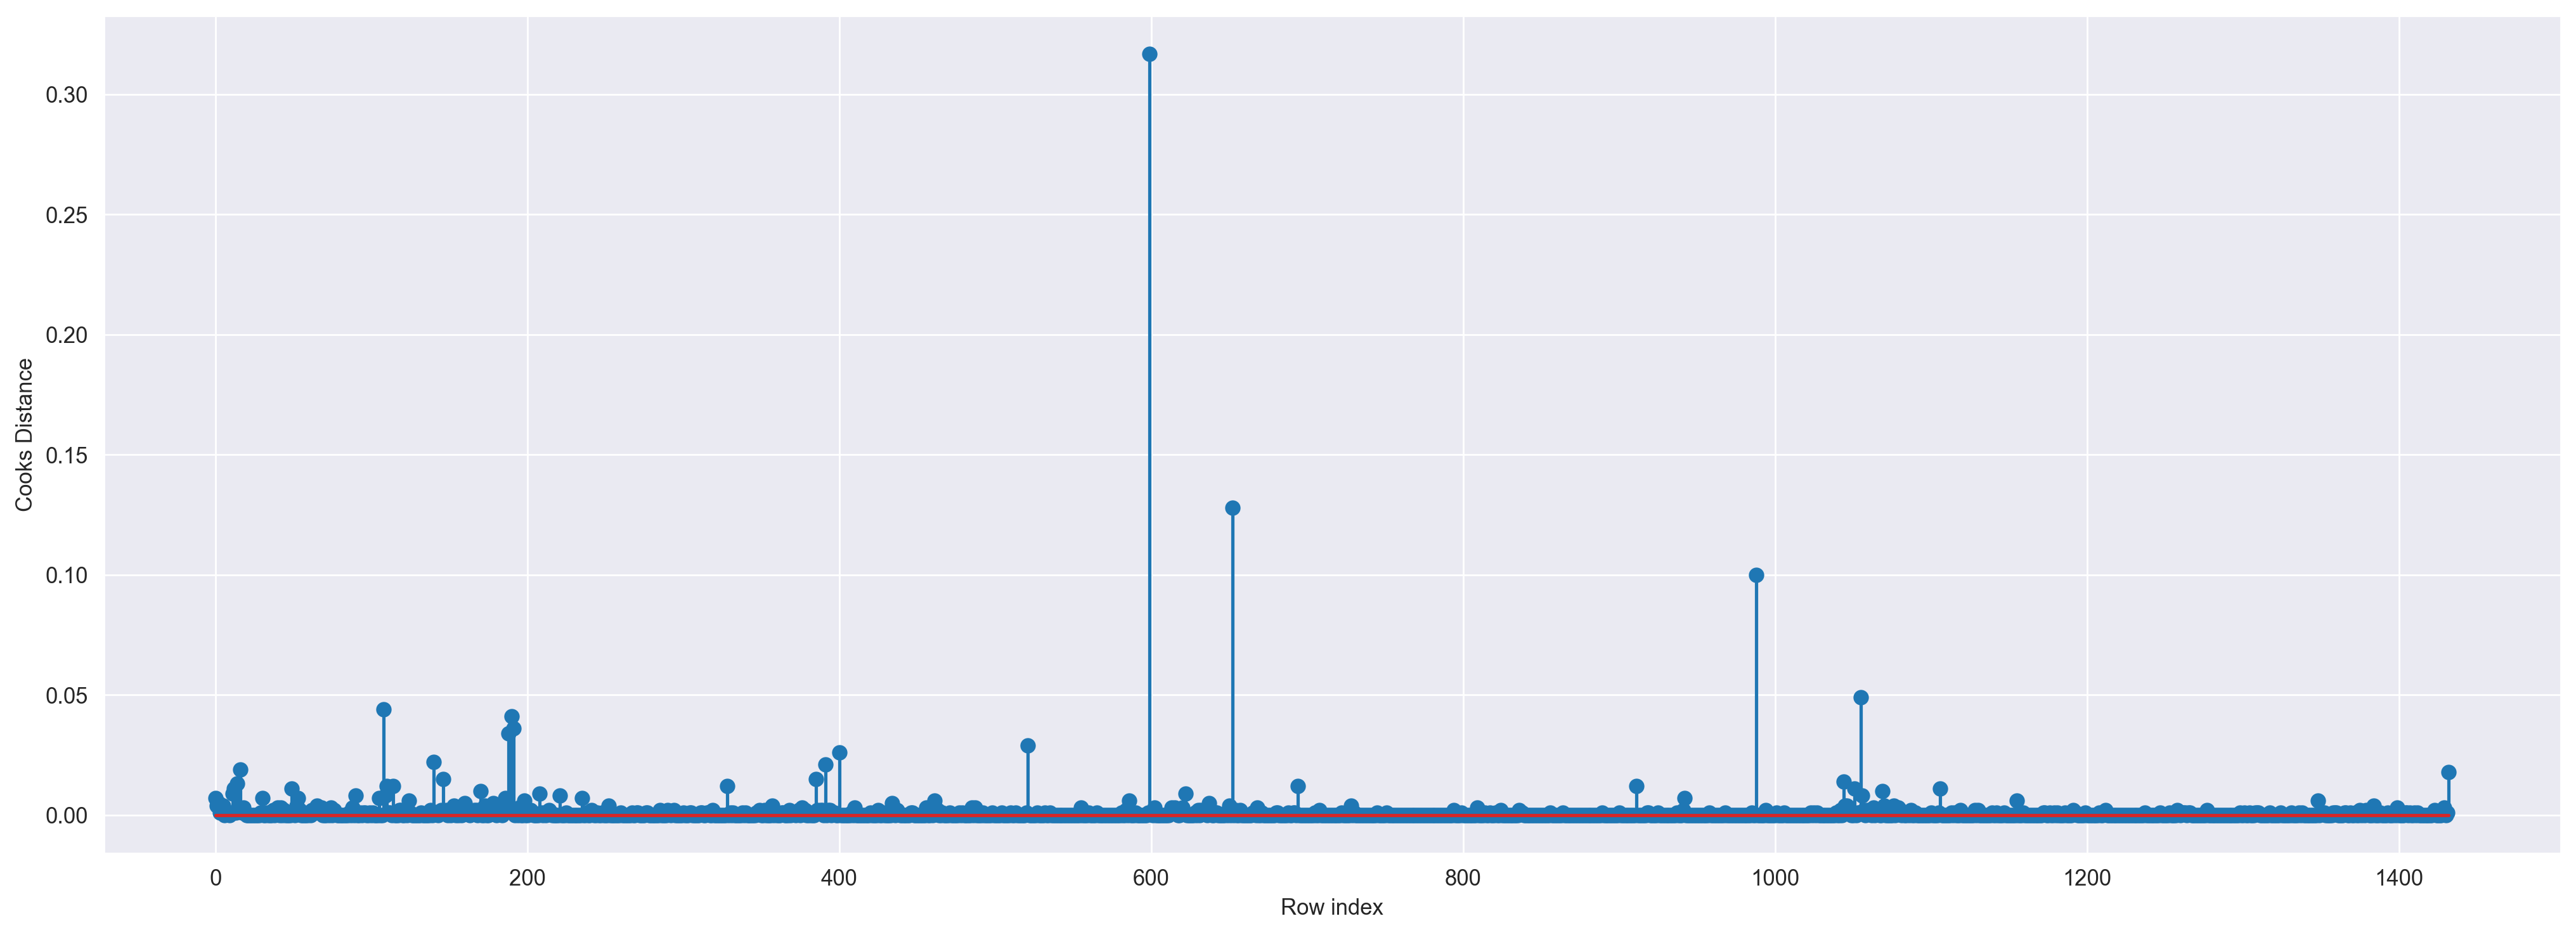

In [145]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfnew5)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [146]:

#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(599, 0.31661315281442187)

In [148]:
#Drop 599 observations
dfnew4=dfnew3.drop(dfnew3.index[[599]],axis=0)
dfnew4

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1432 rows x 9 columns]

In [149]:
#Reset the index and re arrange the row values
dfnew5=dfnew4.reset_index()

In [150]:
dfnew6=dfnew5.drop(['index'],axis=1)
dfnew6

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1427   7500         69  20544   86  1300      3      5             69    1025
1428  10845         72  19000   86  1300      3      5             69    1015
1429   8500         71  17016   86  1300      3      5             69    1015
1430   7250         70  16916   86  1300      3      5             69    1015
1431   6950         76      1  110  1600      5      5             19    1114

[1432 rows x 9 columns]

In [151]:
final_ml_= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data =dfnew6).fit()

In [152]:
#Again check for influencers
model_influence_ = final_ml_.get_influence()
(c_, _) = model_influence_.cooks_distance

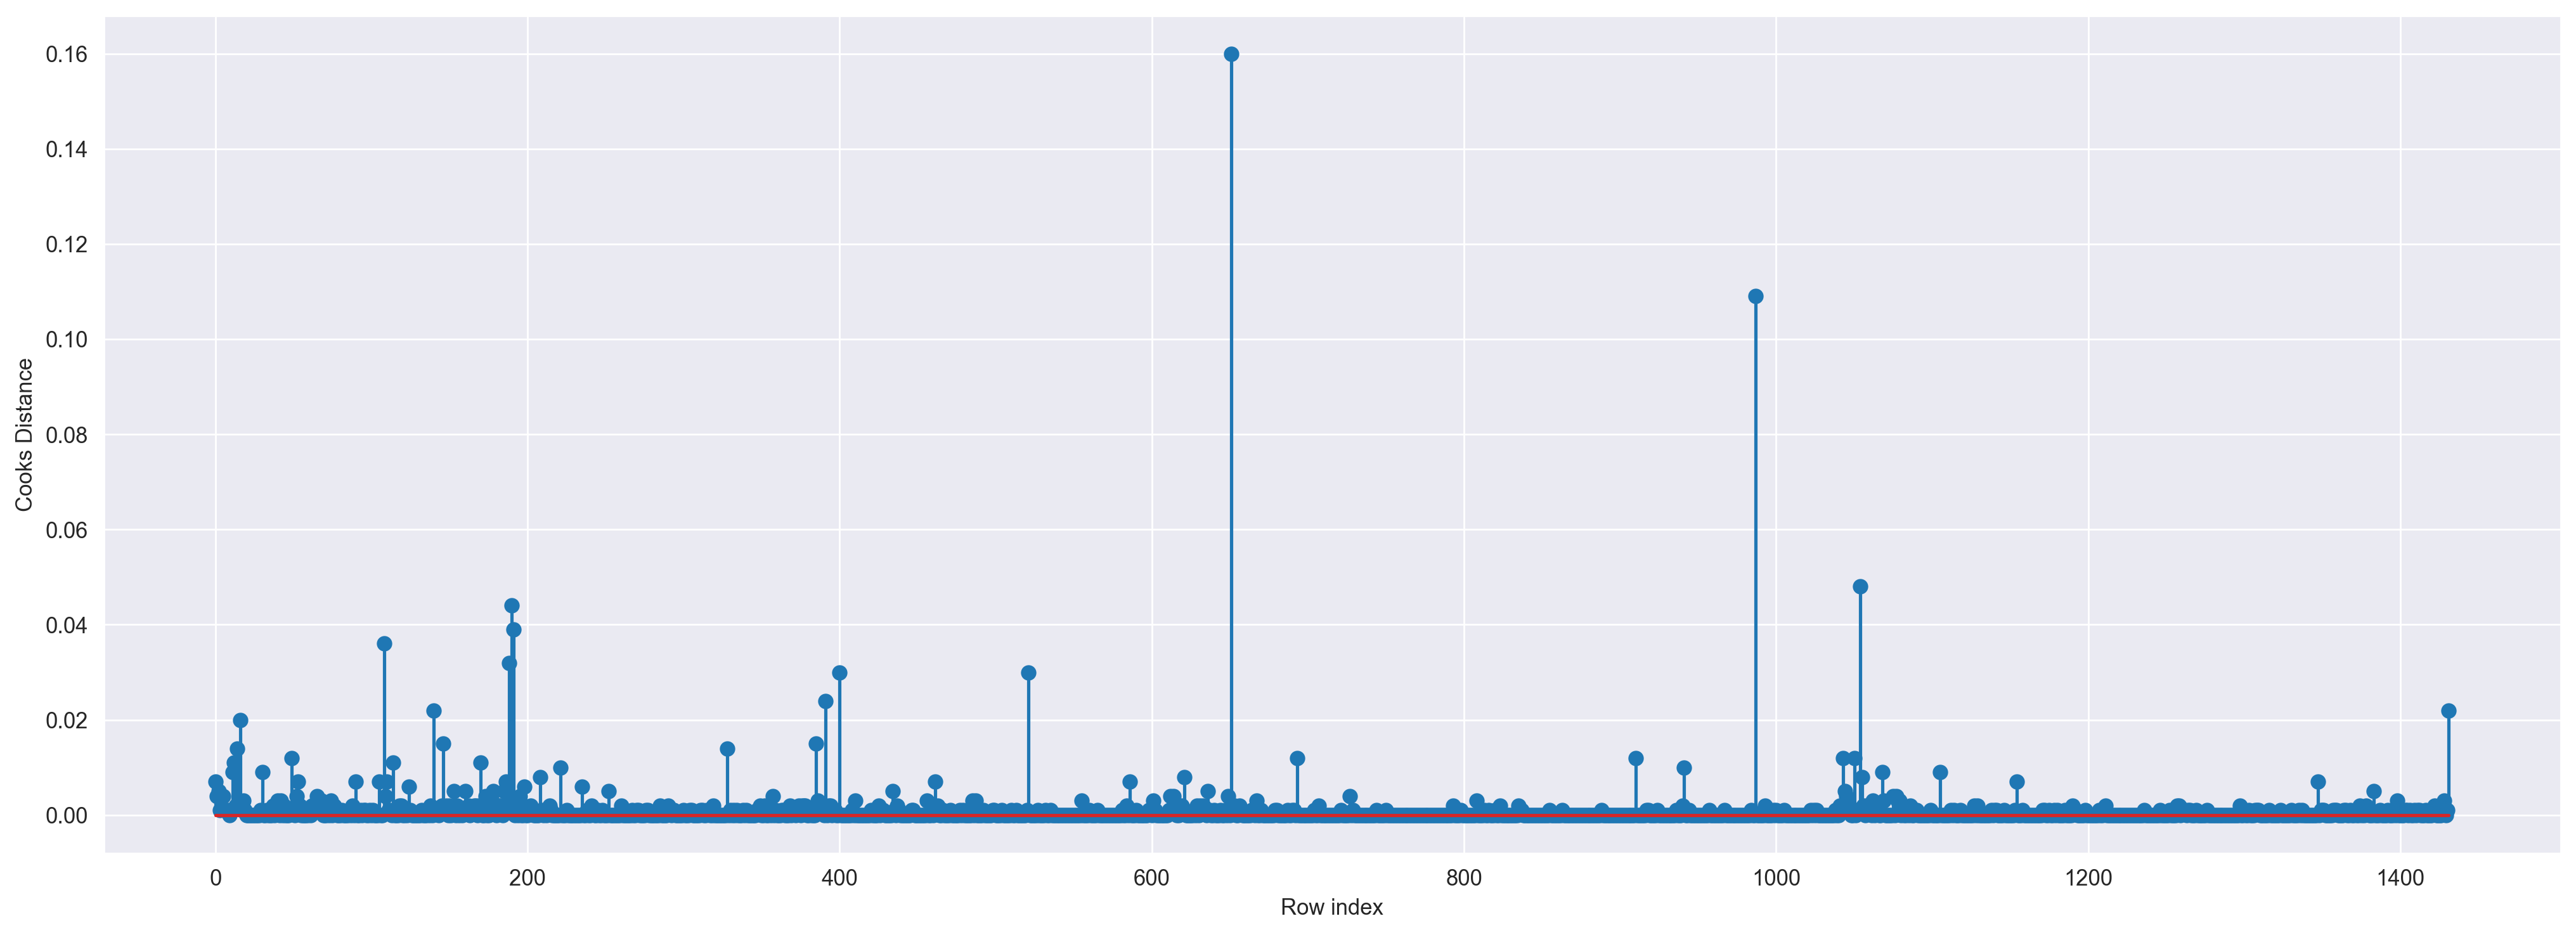

In [153]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfnew6)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


In [154]:
#index of the data points where c is more than .5
(np.argmax(c_),np.max(c_))

(651, 0.16031135298926172)

# Since the value is <1 , we can stop the diagnostic process and finalize the model

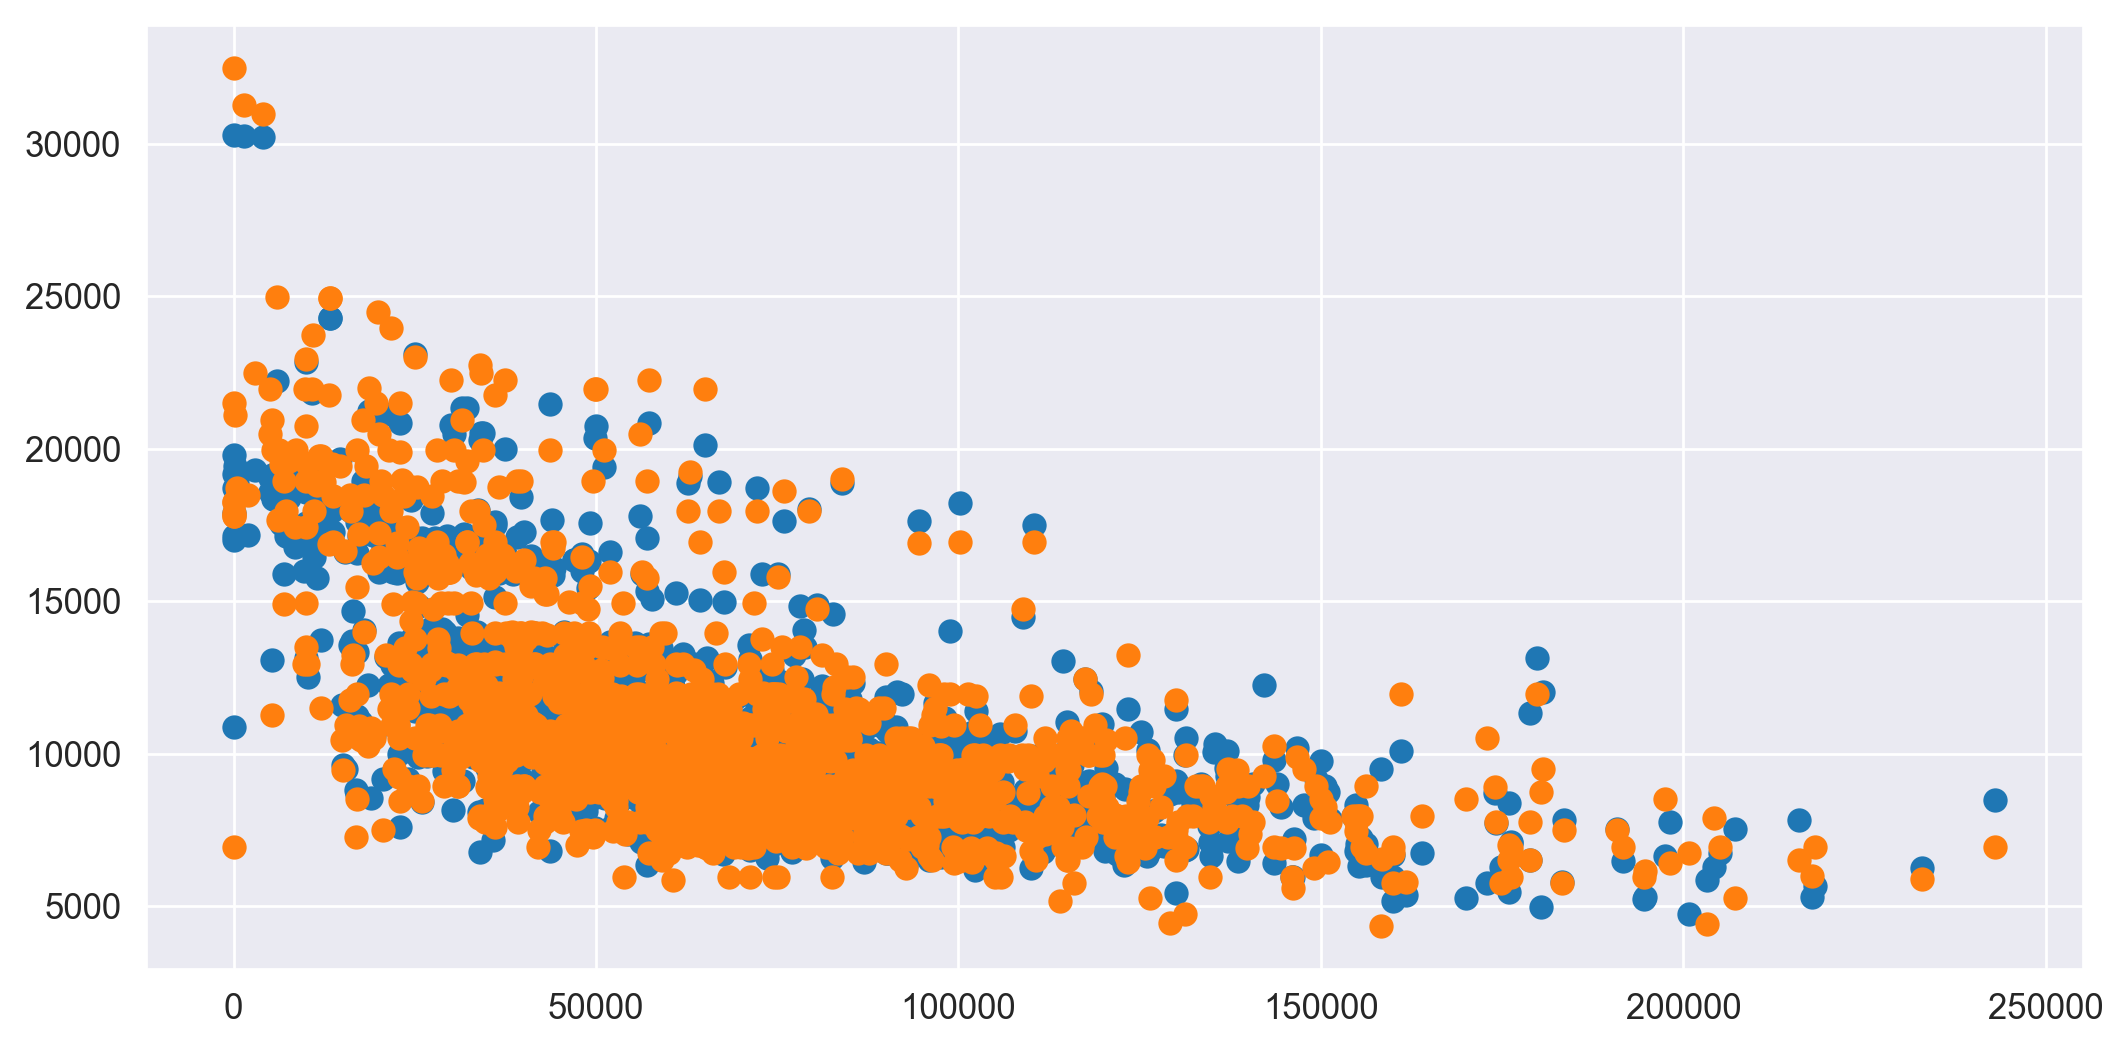

In [159]:
plt.scatter(dfnew6.KM,final_ml_.predict(dfnew6))
plt.scatter(dfnew6.KM,dfnew6.Price)
plt.show()

<AxesSubplot:xlabel='KM', ylabel='Price'>

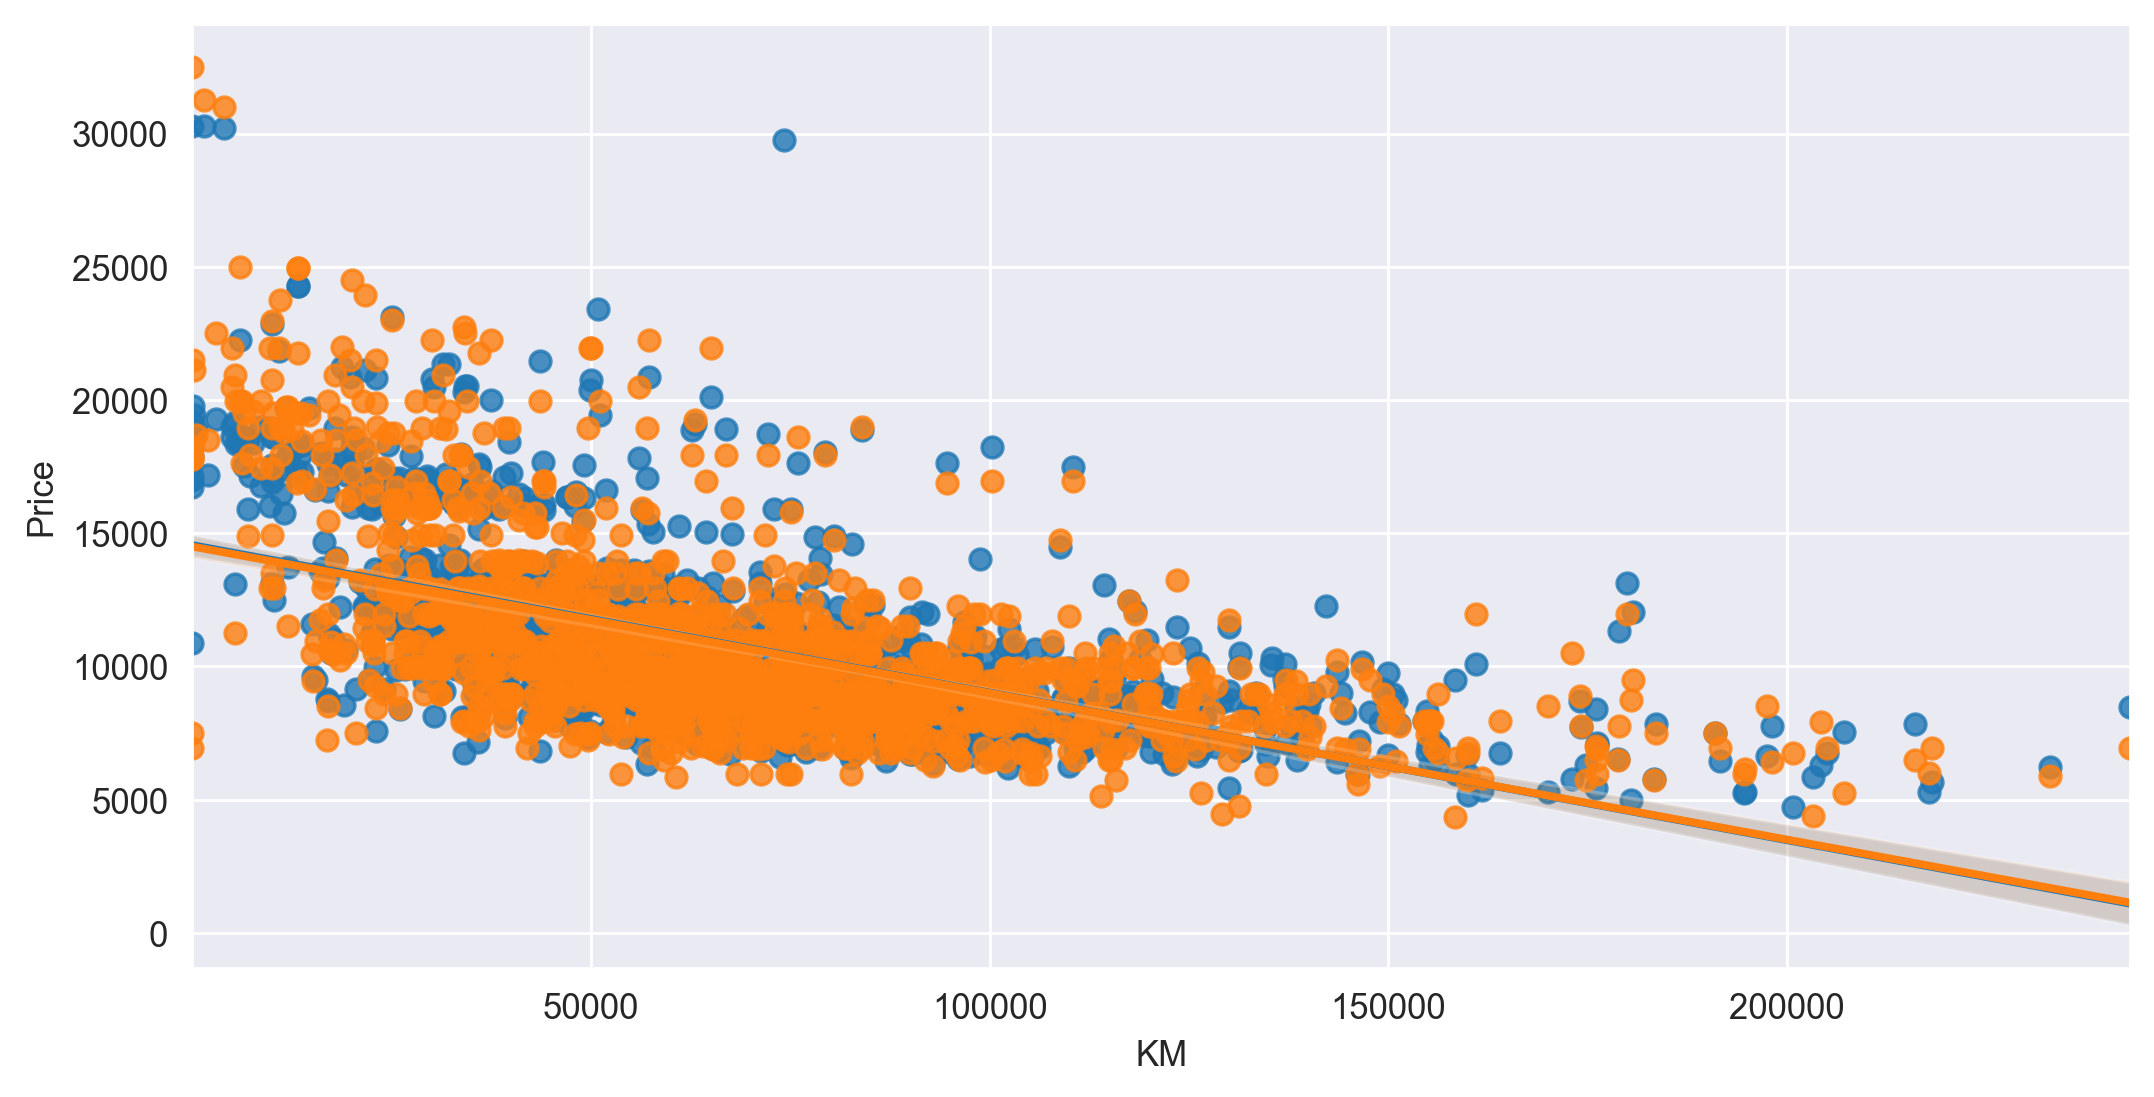

In [161]:
sns.regplot(df.KM,final_ml_.predict(df))
sns.regplot(df.KM,df.Price)

# Predicting for new data

In [166]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":23,"KM":45621,"HP":90,"cc":1600,"Doors":3,"Gears":5,"Quarterly_Tax":210,"Weight":1170},index=[1])

In [167]:
pred_y=final_ml_.predict(new_data)
pred_y

1    18011.185656
dtype: float64

In [169]:
pred_y1=final_ml_.predict(df)
pred_y1

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1430     9161.797882
1431     8536.169181
1432     8681.605150
1433     8793.704782
1434    10863.423359
Length: 1435, dtype: float64

In [171]:
pred_y1[577]

11003.840568846112